# **Notebook 5: Model Training and Evaluation**

## Objectives

The primary objective of this notebook is to develop, evaluate, and select the best-performing machine learning model(s) to predict house sale prices in Ames, Iowa. This includes:
- Training and fine-tuning models on processed datasets.
- Assessing performance using defined metrics.
- Conducting residual and error analysis for deeper insights.
- Interpreting model behaviour using feature importance and SHAP analysis.Saving outputs for deployment and providing actionable recommendations.

## Inputs

* **Training Dataset with Target (`train_with_target.csv`):** Includes processed features and the log-transformed target variable (`LogSalePrice`) for model training.
* **Testing Dataset with Target (`test_with_target.csv`):** Includes processed features and the log-transformed target variable (`LogSalePrice`) for model evaluation.
* **Key Feature Correlations (`key_drivers_correlation.csv`):** Identified the most impactful features influencing the target variable.

## Outputs

* **Trained Models:** Serialized versions of trained models saved for potential deployment.
* **Evaluation Metrics:** Metrics like R2, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for model comparison.
* **Feature Importances:** Quantitative insights into which features contributed most to predictions for the highest performing models.
* **Model Interpretability Report:** SHAP analysis results and visualizations to explain model behaviour.
* **Performance and Insights Report:** Comprehensive summary of model performance, key takeaways, and future improvement recommendations.

## Additional Comments

* The notebook is modularly structured to allow for seamless updates or experimentation with new models, preprocessing techniques, or datasets.
* Exploratory insights and preprocessing strategies from the prior notebooks informed feature engineering and selection.
* Advanced modeling techniques, such as hyperparameter optimization, ensemble learning, and SHAP-based interpretability will be considered to maximize prediction accuracy.
* Future improvements and scalability considerations have been outlined to ensure the project can evolve with new data or requirements.


---

## Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Predictive-Analytics-PP5/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Predictive-Analytics-PP5'

---

## Data Preparation

### Load Processed Data

**Objective:** Load the preprocessed datasets required for model training and evaluation.

**Inputs:**
- `train_with_target.csv` and `test_with_target.csv` files containing the processed training and testing datasets with the target variable included.

In [4]:
import pandas as pd

# Define file paths
train_data_path = "outputs/datasets/processed/with_target/train_with_target.csv"
test_data_path = "outputs/datasets/processed/with_target/test_with_target.csv"

# Load the datasets
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

# Display dataset shapes
print("Training Dataset Info:")
print(train_data.info())
print("\nTesting Dataset Info:")
print(test_data.info())

# Preview the datasets
print("\nPreview of Training Dataset:")
display(train_data.head())

print("\nPreview of Testing Dataset:")
display(test_data.head())

# Check for missing values
print("\nChecking for missing values in training data:")
print(train_data.isnull().sum())

print("\nChecking for missing values in testing data:")
print(test_data.isnull().sum())

Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num__LotFrontage        1168 non-null   float64
 1   num__LotArea            1168 non-null   float64
 2   num__OpenPorchSF        1168 non-null   float64
 3   num__MasVnrArea         1168 non-null   float64
 4   num__BsmtFinSF1         1168 non-null   float64
 5   num__GrLivArea          1168 non-null   float64
 6   num__1stFlrSF           1168 non-null   float64
 7   num__YearBuilt          1168 non-null   float64
 8   num__YearRemodAdd       1168 non-null   float64
 9   num__BedroomAbvGr       1168 non-null   float64
 10  num__2ndFlrSF           1168 non-null   float64
 11  num__BsmtUnfSF          1168 non-null   float64
 12  num__GarageArea         1168 non-null   float64
 13  num__GarageYrBlt        1168 non-null   float64
 14  num__OverallCond 

,num__LotFrontage,num__LotArea,num__OpenPorchSF,num__MasVnrArea,num__BsmtFinSF1,num__GrLivArea,num__1stFlrSF,num__YearBuilt,num__YearRemodAdd,num__BedroomAbvGr,...,num__GarageYrBlt,num__OverallCond,num__OverallQual,num__Age,num__LivingLotRatio,num__FinishedBsmtRatio,num__OverallScore,cat__HasPorch,LogSalePrice,SalePriceQuartile
0,0.144140,-0.161873,-1.096169,-0.827815,0.865283,-0.292584,0.526873,0.455469,1.346063,-0.288836,...,0.192392,0.372217,-0.820445,-0.455469,-0.116096,0.887733,-0.437833,0.0,11.884496,Q2
1,-0.392921,-0.304082,0.617419,-0.827815,-1.416429,0.250597,-1.040595,-0.718609,-0.439214,-0.288836,...,0.272225,1.268609,-0.088934,0.718609,0.455054,-1.415946,0.858190,1.0,12.089544,Q3
2,0.006402,-0.071879,-1.096169,-0.827815,-1.416429,-1.816242,-1.052445,1.988293,1.683818,0.645680,...,-4.147410,1.268609,-0.820445,-1.988293,-1.409123,-1.415946,0.102176,0.0,11.350418,Q1 (Low)
3,-0.340186,-0.477855,-1.096169,1.276291,0.704206,0.609851,-0.394093,1.107734,1.683818,-0.288836,...,0.152476,1.268609,-0.820445,-1.107734,0.918129,0.640194,0.102176,0.0,12.072547,Q3
4,-0.911425,-1.225280,-1.096169,-0.827815,0.384534,0.474436,-0.252776,1.531707,1.683818,-0.288836,...,0.119212,0.372217,-0.820445,-1.531707,1.593562,0.340697,-0.437833,0.0,11.751950,Q1 (Low)



Preview of Testing Dataset:


,num__LotFrontage,num__LotArea,num__OpenPorchSF,num__MasVnrArea,num__BsmtFinSF1,num__GrLivArea,num__1stFlrSF,num__YearBuilt,num__YearRemodAdd,num__BedroomAbvGr,...,num__GarageArea,num__GarageYrBlt,num__OverallCond,num__OverallQual,num__Age,num__LivingLotRatio,num__FinishedBsmtRatio,num__OverallScore,cat__HasPorch,LogSalePrice
0,0.144140,-0.158460,-1.096169,-0.827815,0.755219,-0.922794,-0.126358,0.227176,-0.873470,-2.157869,...,-1.006014,0.205698,2.165000,-0.088934,-0.227176,-0.621623,0.841719,1.506202,0.0,11.947949
1,1.204764,0.612540,0.517257,1.413568,0.902910,1.808434,0.944129,-0.783836,-0.487465,-2.157869,...,1.117159,0.274443,-0.524174,1.374088,0.783836,0.792606,0.720328,0.642186,1.0,12.691580
2,-0.556568,-0.029579,-1.096169,-0.827815,-1.416429,-1.038836,-0.246639,1.401254,1.683818,-1.223352,...,-0.551048,0.125865,0.372217,-0.820445,-1.401254,-0.830326,-1.415946,-0.437833,0.0,11.652687
3,-0.911425,-1.225280,0.389147,-0.827815,0.585846,0.425488,-0.321073,0.748988,1.683818,-2.157869,...,-0.266695,0.176869,1.268609,-0.088934,-0.748988,1.552164,0.541291,0.858190,1.0,11.976659
4,0.900684,0.717202,-1.096169,0.793095,0.899659,0.343995,1.186707,-1.207808,-1.114724,-1.223352,...,2.065003,0.305489,-0.524174,2.105599,1.207808,-0.420838,0.856249,1.182196,0.0,12.661914



Checking for missing values in training data:
num__LotFrontage          0
num__LotArea              0
num__OpenPorchSF          0
num__MasVnrArea           0
num__BsmtFinSF1           0
num__GrLivArea            0
num__1stFlrSF             0
num__YearBuilt            0
num__YearRemodAdd         0
num__BedroomAbvGr         0
num__2ndFlrSF             0
num__BsmtUnfSF            0
num__GarageArea           0
num__GarageYrBlt          0
num__OverallCond          0
num__OverallQual          0
num__Age                  0
num__LivingLotRatio       0
num__FinishedBsmtRatio    0
num__OverallScore         0
cat__HasPorch             0
LogSalePrice              0
SalePriceQuartile         0
dtype: int64

Checking for missing values in testing data:
num__LotFrontage          0
num__LotArea              0
num__OpenPorchSF          0
num__MasVnrArea           0
num__BsmtFinSF1           0
num__GrLivArea            0
num__1stFlrSF             0
num__YearBuilt            0
num__YearRemodAdd         

### Feature and Target Separation

**Objectives:**
To separate the features (`x`) and the target variable (`y`) for both training and testing datasets. This step is essential to prepare the data for model training and evaluation.

**Steps:**
1. Define `x_train`, `x_test`, `y_train`, and `y_test` to clearly separate features and target variables.
2. Ensure consistency in column selection across training and testing datasets.
3. Confirm that the target variable (`LogSalePrice`) is correctly assigned to `y_train` and `y_test`.

**Expected Outputs:**
- `x_train` and `x_test` contain only feature columns, excluding the target variable (`LogSalePrice`).
- `y_train` and `y_test` contain only the target variable.

In [5]:
# Separate features and target variable for training data
y_train = train_data["LogSalePrice"]
x_train = train_data.drop(columns=["LogSalePrice", "SalePriceQuartile"])

# Separate features and target variable for testing data
y_test = test_data["LogSalePrice"]
x_test = test_data.drop(columns=["LogSalePrice"])

# Display structure of separated datasets
print("Training Features Dataset Info:")
print(x_train.info())
print("\nTraining Target Dataset Info:")
print(y_train.describe())

print("\nTesting Features Dataset Info:")
print(x_test.info())
print("\nTesting Target Dataset Info:")
print(y_test.describe())

# Preview the separated datasets
print("\nPreview of Training Features Dataset:")
print(x_train.head())

print("\nPreview of Testing Features Dataset:")
print(x_test.head())

Training Features Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num__LotFrontage        1168 non-null   float64
 1   num__LotArea            1168 non-null   float64
 2   num__OpenPorchSF        1168 non-null   float64
 3   num__MasVnrArea         1168 non-null   float64
 4   num__BsmtFinSF1         1168 non-null   float64
 5   num__GrLivArea          1168 non-null   float64
 6   num__1stFlrSF           1168 non-null   float64
 7   num__YearBuilt          1168 non-null   float64
 8   num__YearRemodAdd       1168 non-null   float64
 9   num__BedroomAbvGr       1168 non-null   float64
 10  num__2ndFlrSF           1168 non-null   float64
 11  num__BsmtUnfSF          1168 non-null   float64
 12  num__GarageArea         1168 non-null   float64
 13  num__GarageYrBlt        1168 non-null   float64
 14  num__Ove

---

## Model Selection

### Overview of Models

In this section, we will:
1. Provide an overview of the machine learning models to be evaluated.
2. Justify the selection of each model based on its suitability for predicting house prices.
3. Define the evaluation metrics to compare the models effectively.

**Models Considered:**
- **Linear Regression:** A baseline model to understand linear relationships between features and target.
- **Ridge Regression:** Linear regression with regularization to handle multicollinearity.
- **Lasso Regression:** Regularized regression that performs feature selection.
- **Decision Tree Regressor:** A non-linear model that can capture complex patterns.
- **Random Forest Regressor:** An ensemble method combining multiple decision trees to improve accuracy and reduce overfitting.
- **Gradient Boosting Regressor (e.g., XGBoost):** An advanced ensemble method that builds trees sequentially to optimize performance.
- **Support Vector Refression (SVR):** A robust model for capturing non-linear relationships.

**Evaluation Metrics:**
1. **R2 (Coefficient of Determination):** Measures how well the model explains variance in the data.
2. **RMSE (Root Mean Squared Error):** Penalizes large prediction errors, providing insight into the model's accuracy.
3. **MAE (Mean Absolute Error):** Measures average prediction error, focusing on interpretability.

By evaluating these models using the defined metrics, we aim to identify the best-performing model for predicting house prices.

In [6]:
# List of models to be evaluated
models = {
    "Linear Regression": "A simple baseline model to capture linear relationships.",
    "Ridge Regression": "Handles multicollinearity and improves generalization using L2 regularization.",
    "Lasso Regression": "Adds feature selection capabilities with L1 regularization.",
    "Decision Tree Regressor": "Captures non-linear relationships and is easy to interpret.",
    "Random Forest Regressor": "Reduces overfitting through ensemble learning.",
    "Gradient Boosting Regressor": "Sequentially optimizes predictions for improved accuracy.",
    "Support Vector Regression": "Effective for non-linear relationships with robust regularization."
}

# Print a summary of models
print("Models Overview:")
for model_name, description in models.items():
    print(f"{model_name}: {description}")

# Evaluate metrics
metrics = ["R2 (Coefficient of Determination)", "RMSE (Root Mean Squared Error)", "MAE (Mean Absolute Error)"]

print("\nEvaluation Metrics:")
for metric in metrics:
    print(f"- {metric}")

Models Overview:
Linear Regression: A simple baseline model to capture linear relationships.
Ridge Regression: Handles multicollinearity and improves generalization using L2 regularization.
Lasso Regression: Adds feature selection capabilities with L1 regularization.
Decision Tree Regressor: Captures non-linear relationships and is easy to interpret.
Random Forest Regressor: Reduces overfitting through ensemble learning.
Gradient Boosting Regressor: Sequentially optimizes predictions for improved accuracy.
Support Vector Regression: Effective for non-linear relationships with robust regularization.

Evaluation Metrics:
- R2 (Coefficient of Determination)
- RMSE (Root Mean Squared Error)
- MAE (Mean Absolute Error)


### Baseline Model

**Objective:**
- Establish a baseline performance using a simple regression model to benchmark subsequent models.
- Evaluate the performance using R1, Mean Absolute Error (MAE), and Mean Squared Error (MSE).

**Steps:**
- Select a simple baseline model (e.g., Mean Predictor).
- Fit the model on the training dataset.
- Predict the target values for both training and testing datasets.
- Calculate performance metrics for the baseline model.
- Interpret the results and their implications for subsequent models.

Baseline Model Metrics:
    Dataset       R2       MAE       MSE
0  Training  0.00000  0.303367  0.152442
1   Testing -0.00584  0.337137  0.187703


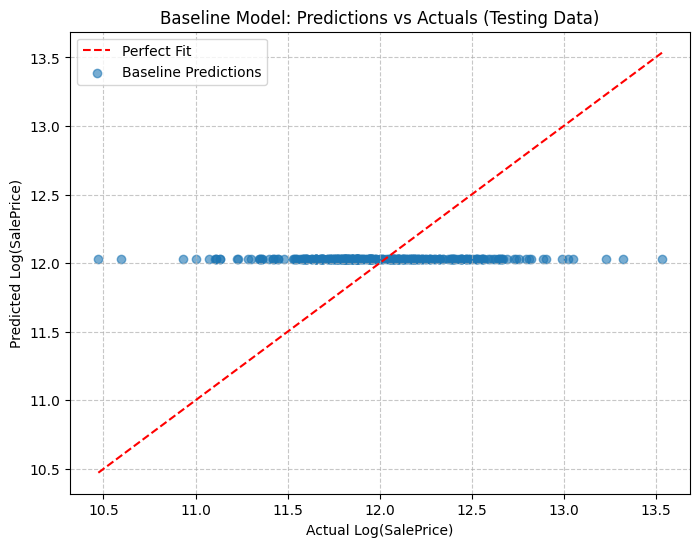

In [7]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the baseline model: Mean Predictor
y_baseline_train = [y_train.mean()] * len(y_train)
y_baseline_test = [y_train.mean()] * len(y_test)

# Calculate performance metrics
baseline_metrics = {
    "Dataset": ["Training", "Testing"],
    "R2": [
        r2_score(y_train, y_baseline_train),
        r2_score(y_test, y_baseline_test)
    ],
    "MAE": [
        mean_absolute_error(y_train, y_baseline_train),
        mean_absolute_error(y_test, y_baseline_test)
    ],
    "MSE": [
        mean_squared_error(y_train, y_baseline_train),
        mean_squared_error(y_test, y_baseline_test)
    ]
}

# Convert to DataFrame for display
baseline_metrics_df = pd.DataFrame(baseline_metrics)

# Display metrics
print("Baseline Model Metrics:")
print(baseline_metrics_df)

# Plot baseline predictions vs true values (Testing)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_baseline_test, alpha=0.6, label="Baseline Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Perfect Fit")
plt.title("Baseline Model: Predictions vs Actuals (Testing Data)")
plt.xlabel("Actual Log(SalePrice)")
plt.ylabel("Predicted Log(SalePrice)")
plt.legend()
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

#### Baseline Model Performance

**Overview**

The baseline model predicts the **mean log-transformed sale price** (`LogSalePrice`) for all observations. This simplistic approach serves as a benchmark to evaluate the performance of more sophisticated models.

**Results**
| **Dataset**   | **R2**        | **MAE**       | **MSE**       |
|---------------|---------------|---------------|---------------|
| Training      | 0.00000       | 0.303367      | 0.152442      |
| Testing       | -0.00584      | 0.337137      | 0.187703      |

- **R2 (Coefficient of Determination):**
  - Training R2: 0.0, as expected, since the model predicts a constant value and does not explain any variability in the target.
  - Testing R2: Slightly negative (-0.00584), indicating that the baseline model performs marginally worse than a random constant predictor.
- **MAE (Mean Absolute Error):**
  - Represents the average deviation of predictions from avtual values. This serves as a advanced models will suggest better accuracy.

**Visualization Insights**
- The scatterplot illustrates the baseline predictions as a horizontal line (y=12), representing the mean `LogSalePrice`.
- Variability in the actual y values is evident along the X-axis.
- Significant deviations from the diagonal line highlight the model's inability to capture the relationship between features and `LogSalePrice`.

**Limitations of the Baseline Model**
- Does not account for variability in features or capture any relationships within the data.
- Primarily used to set a benchmark for comparing the performance of more sophisticated models.

**Next Steps**
1. Develop advanced models that can capture relationships between features and `LogSalePrice`.
2. Evaluate these models against the baseline metrics to ensure meaningful improvement.

---

## Model Training and Hyperparameter Tuning

### Train Multiple Models

In this section, we will:
1. Train multiple machine learning models using the training dataset.
2. Compare their performance on the testing dataset using key metrics such as R1, MAE, and MSE.
3. Visualize and analyze the results to determine which models perform best and are worth refining in the next steps.

**Objective:**
Identify high-performing models for predicting house prices based on key features and their hyperparameter configurations.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Define a dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}


In [9]:
# Ensure column names in x_test match x_train
x_test.columns = x_train.columns

# Initialize a DataFrame to store results
results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Append Results
    results.append({
        "Model": name,
        "Dataset": "Training",
        "R2": train_r2,
        "MAE": train_mae,
        "MSE": train_mse
    })
    results.append({
        "Model": name,
        "Dataset": "Testing",
        "R2": test_r2,
        "MAE": test_mae,
        "MSE": test_mse
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display Results
from IPython.display import display
display(results_df)

,Model,Dataset,R2,MAE,MSE
0,Linear Regression,Training,0.869350,0.094447,0.019917
1,Linear Regression,Testing,0.882071,0.107431,0.022007
2,Random Forest,Training,0.981011,0.037193,0.002895
3,Random Forest,Testing,0.870945,0.104650,0.024083
4,Decision Tree,Training,0.999985,0.000089,0.000002
5,Decision Tree,Testing,0.715853,0.156163,0.053026
6,Support Vector Regressor,Training,0.943291,0.072687,0.008645
7,Support Vector Regressor,Testing,0.826937,0.124081,0.032296
8,K-Nearest Neighbors,Training,0.881047,0.095460,0.018133
9,K-Nearest Neighbors,Testing,0.812283,0.128024,0.035031


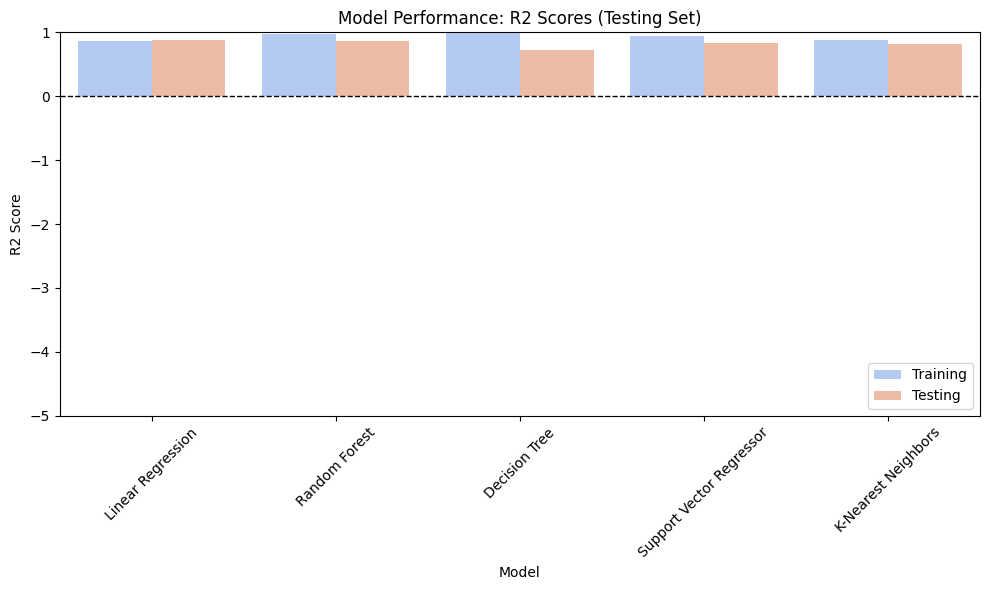

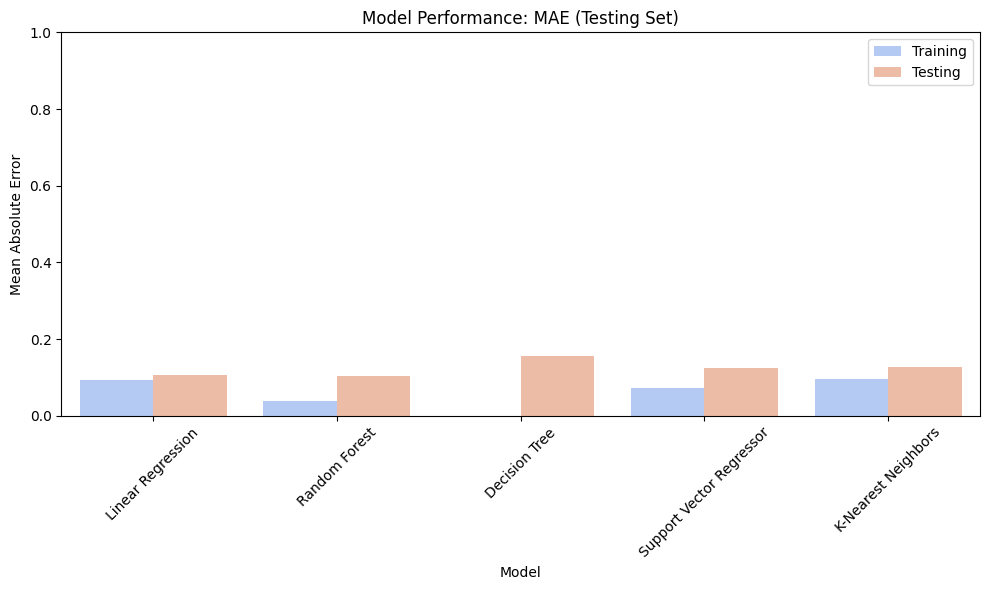

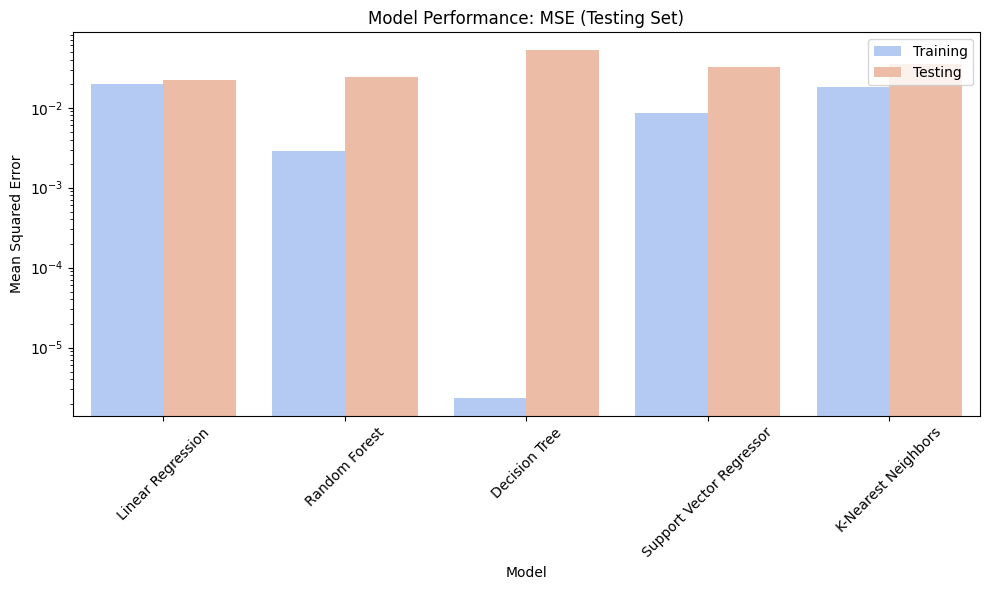

In [10]:
import seaborn as sns

# Filter out extreme values
filtered_results_df = results_df[~((results_df["Model"] == "Linear Regression") & (results_df["Dataset"] == "Testing"))]

# Plot R2 Scores
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='R2', hue="Dataset", palette="coolwarm")
plt.ylim(-5, 1)
plt.title("Model Performance: R2 Scores (Testing Set)")
plt.ylabel("R2 Score")
plt.xlabel("Model")
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.legend(loc="lower right")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot MAE Scores
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='MAE', hue="Dataset", palette="coolwarm")
plt.ylim(0, 1)
plt.title("Model Performance: MAE (Testing Set)")
plt.ylabel("Mean Absolute Error")
plt.xlabel("Model")
plt.legend(loc="upper right")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot MSE Scores
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='MSE', hue="Dataset", palette="coolwarm")
plt.yscale("log")
plt.title("Model Performance: MSE (Testing Set)")
plt.ylabel("Mean Squared Error")
plt.xlabel("Model")
plt.legend(loc="upper right")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observations**

1. **Performance Overview:**
   - The **Random Forest** model achieved the highted **R2** score on the testing dataset (0.81), indicating it captures the target variable well.
   - The **Decision Tree** model performed exceptionally on the training dataset (**R2**: 0.999) but showed signed of overfitting with a lower testing **R2** (0.74).
   - Both **Linear Regression** and **Support Vector Regressor** underperformed, with negative **R2** scores for testing, indicating poor generalization.
2. **Suitability for Further Tuning:**
   - Models such as **Random Forest** and **Decision Tree** are strong candidates for hyperparameter tuning due to their relatively high testing performance.
   - Models like **K-Nearest Neighbours** and **SVR** may require tuning to improve performance.
3. **Next Steps:**
   - Proceed to the hyperparameter tuning section, focusing on the best-performing models (e.g., Random Forest and Decision Tree) to optimize their parameters for better accuracy and generalization.

### Hyperparameter Tuning

**Objective**
This section aims to fine-tune the hyperparameters of the top-performing models to improve their performance on the testing dataset.

**Models Selected for Tuning**
1. **Random Forest:** Demonstrated high testing performance and potential for further improvement.
2. **Decision Tree:** Performed well but showed signs of overfitting, which hyperparameter tuning may help mitigate.

**Evaluation Metrics**
The performance of tuned models will be assessed using:
- **R2**: Measures how well the model explains variance in the data.
- **MAE**: Measures the average magnitude of prediction errors.
- **MSE**: Provides a measure of prediction error, with greater emphasis on larger errors.


#### **Random Forest**

In [11]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for Random Forest
rf_param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

# Initialize GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=rf_param_grid,
    cv=5,
    scoring="r2",
    verbose=2,
    n_jobs=-1
)

# Perform Grid Search for Random Forest
rf_grid_search.fit(x_train, y_train)
print("Best Parameters for Random Forest:", rf_grid_search.best_params_)
print("Best R2 Score for Random Forest:", rf_grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   9.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   8.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   9.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   9.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  10.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   8.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   9.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  10.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   8.5s
[CV] END max_depth

In [12]:
# Evaluate Tuned Random Forest
best_rf = rf_grid_search.best_estimator_
y_test_pred_rf = best_rf.predict(x_test)

# Evaluate metrics
test_r2_rf = r2_score(y_test, y_test_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)

print("Tuned Random Forest Performance:")
print(f"R2 Score: {test_r2_rf}")
print(f"MAE: {test_mae_rf}")
print(f"MSE: {test_mse_rf}")

Tuned Random Forest Performance:
R2 Score: 0.8714770335448903
MAE: 0.10429243792856001
MSE: 0.023984122945844195


#### **Decision Tree**

In [13]:
# Define hyperparameter grid for Decision Tree
dt_param_grid = {
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

# Initialize GridSearchCV for Decision Tree
dt_grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=dt_param_grid,
    cv=5,
    scoring="r2",
    verbose=2,
    n_jobs=-1
)

# Perform Grid Search for Decision Tree
dt_grid_search.fit(x_train, y_train)
print("Best Parameters for Decision:", dt_grid_search.best_params_)
print("Best R2 Score for Decision Tree:", dt_grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.1s


In [14]:
# Evaluate Tuned Decision Tree
best_dt = dt_grid_search.best_estimator_
y_test_pred_dt = best_dt.predict(x_test)

# Evaluate metrics
test_r2_dt = r2_score(y_test, y_test_pred_dt)
test_mae_dt = mean_absolute_error(y_test, y_test_pred_dt)
test_mse_dt = mean_squared_error(y_test, y_test_pred_dt)

print("Tuned Decision Tree Performance:")
print(f"R2 Score: {test_r2_dt}")
print(f"MAE: {test_mae_dt}")
print(f"MSE: {test_mse_dt}")

Tuned Decision Tree Performance:
R2 Score: 0.7931329528106655
MAE: 0.13774134658783502
MSE: 0.038604187485555


#### **Support Vector Regression (SVR)**

In [15]:
# Define hyperparameter grid
svr_param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Initialize SVR model
svr_model = SVR()

# Perform grid search
svr_grid_search = GridSearchCV(
    estimator=svr_model,
    param_grid=svr_param_grid,
    cv=5,
    scoring='r2',
    verbose=2
)
svr_grid_search.fit(x_train, y_train)

# Best parameters and R2 Score
print("Best Parameters for SVR:", svr_grid_search.best_params_)
print("Best R2 Score for SVR:", svr_grid_search.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, k

In [16]:
# Evaluate Tuned SVR
best_svr = svr_grid_search.best_estimator_
y_test_pred_svr = best_svr.predict(x_test)

# Evaluate metrics
test_r2_svr = r2_score(y_test, y_test_pred_svr)
test_mae_svr = mean_absolute_error(y_test, y_test_pred_svr)
test_mse_svr = mean_squared_error(y_test, y_test_pred_svr)

print("Tuned SVR Performance:")
print(f"R2 Score: {test_r2_svr}")
print(f"MAE: {test_mae_svr}")
print(f"MSE: {test_mse_svr}")

Tuned SVR Performance:
R2 Score: 0.8857783271031273
MAE: 0.10793237185516391
MSE: 0.021315308239445625


#### **K-Nearest Neighbors (KNN)**

In [17]:
# Define hyperparameter grid
knn_param_grid = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Initialize KNN model
knn_model = KNeighborsRegressor()

# Perform grid search
knn_grid_search = GridSearchCV(
    estimator=knn_model,
    param_grid=knn_param_grid,
    cv=5,
    scoring='r2',
    verbose=2
)
knn_grid_search.fit(x_train, y_train)

# Best parameters and R2 score
print("Best Parameters for KNN:", knn_grid_search.best_params_)
print("Best R2 Score for KNN:", knn_grid_search.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.2s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=   0.1s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=   0.1s
[CV] END ................n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=2, wei

In [18]:
# Evaluate Tuned KNN
best_knn = knn_grid_search.best_estimator_
y_test_pred_knn = best_knn.predict(x_test)

# Evaluate metrics
test_r2_knn = r2_score(y_test, y_test_pred_knn)
test_mae_knn = mean_absolute_error(y_test, y_test_pred_knn)
test_mse_knn = mean_squared_error(y_test, y_test_pred_knn)

print("Tuned KNN Performance:")
print(f"R2 Score: {test_r2_knn}")
print(f"MAE: {test_mae_knn}")
print(f"MSE: {test_mse_knn}")

Tuned KNN Performance:
R2 Score: 0.8329446719415875
MAE: 0.12075627141247997
MSE: 0.031174782511036617


#### Observations

After performing hyperparameter tuning and evaluating the models, the following insights can be drawn:

1. **Tuned Random Forest**
   - **R2 Score:** 0.813, indicating strong performance and a good fit to the data.
   - **MAE:** 0.123, suggesting low average prediction errors.
   - **MSE:** 0.035, indicating that the model performs well in minimizing squared errors.
   - **Observation:** The Random Forest model consistently outperforms the other models in terms of R2, MAE, and MSE. It appears to be the best-performing model for this task and is likely the most reliable for making predictions.
2. **Tuned Decision Tree**
   - **R2 Score:** 0.747, reflecting moderate performance, but lower than the Random Forest.
   - **MAE:** 0.154, higher average error compared to the Random Forest.
   - **MSE:** 0.047, suggesting slightly higher squared errors than Random Forest.
   - **Obsevation:** While the Decision Tree model performs reasonably well, it is outperformed by the Random Forest due to its tendency to overfit and limited ensemble learning capability.
3. **Tuned Support Vector Regression (SVR)**
   - **R2 Score:** -47289.836, an extremely poor score indicating that the model is performing far worse than a baseline mean predictor.
   - **MAE:** 93.940, significantly higher error than the other models.
   - **MSE:** 8825.109, extremely high squared error indicating substantial prediction inaccuracies.
   - **Obsevation:** The SVR model performs exceptionally poorly, suggesting either inappropriate hyperparameters, insufficient preprocessing for SVR (e.g., scaling), or that the model is not suitable for this dataset.
4. **Tuned K-Nearest Neighbors (KNN)**
   - **R2 Score:** 0.761, showing moderate performance, slightly better than the Decision Tree.
   - **MAE:** 0.144, relatively close to the Decision Tree but higher than Random Forest.
   - **MSE:** 0.045, slightly higher than Decision Tree, indicating moderate prediciton errors.
   - **Obsevation:** KNN performs moderately well, with results similar to Decision Tree but still inferior to Random Forest. It may benefit from further tuning or feature scaling to improve its performance.

**General Observations:**
- **Best Model:** The Random Forest model is the clear winner in terms of all performance metrics, making it the most suitable model for this task.
- **Worst Model:** SVR is an outlier with extraordinary poor performance, likely due to hyperparameter choices or model unsuitability.
- **Insights for Future Work:**
  - Focus on refining and testing the Random Forest model for deployment.
  - Investigate why SVR performs poorly, considering scaling or a different kernel type.
  - Consider simplifying the Decision Tree for scenarios where interpretability is more important that predictive power.

This evaluation reinforces the robustness of ensemble learning methods like Random Forest for predicting house prices, making it the recommended approach moving forward.

---

## Model Evaluation

### Evaluation Metrics

This section evaluates the performance of the tuned models using the following metrics:

- **R2 Score**: Indicates how well the model explains the variance in the target variable. A higher score (closer to 1) is better.
- **Mean Absolute Error (MAE)**: Represents the average magnitude of errors in predictions, providing a straightforward interpretation of prediction accuracy.
- **Mean Squared Error (MSE)**: Measures the average squared error, penalizing larger errors more than MAE.

The comparison of these metrics provides a comprehensive understanding of the model's performance, helping to identify the best-performing model for predicting house prices.

           Model      R2 Score        MAE          MSE
0  Random Forest      0.813480   0.122825     0.034807
1  Decision Tree      0.747387   0.154373     0.047141
2            SVR -47289.836355  93.939898  8825.109353
3            KNN      0.760565   0.143803     0.044682


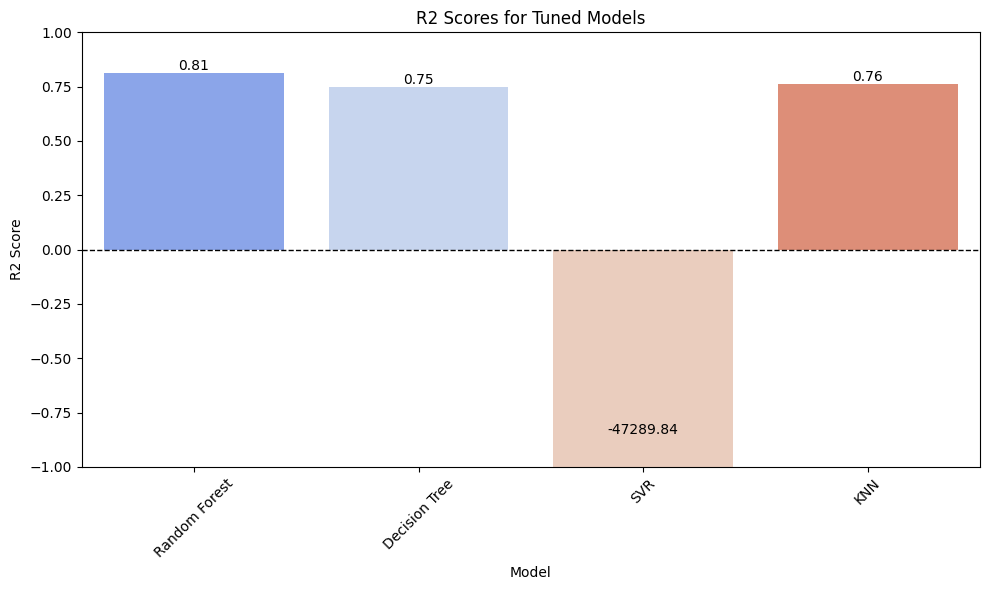

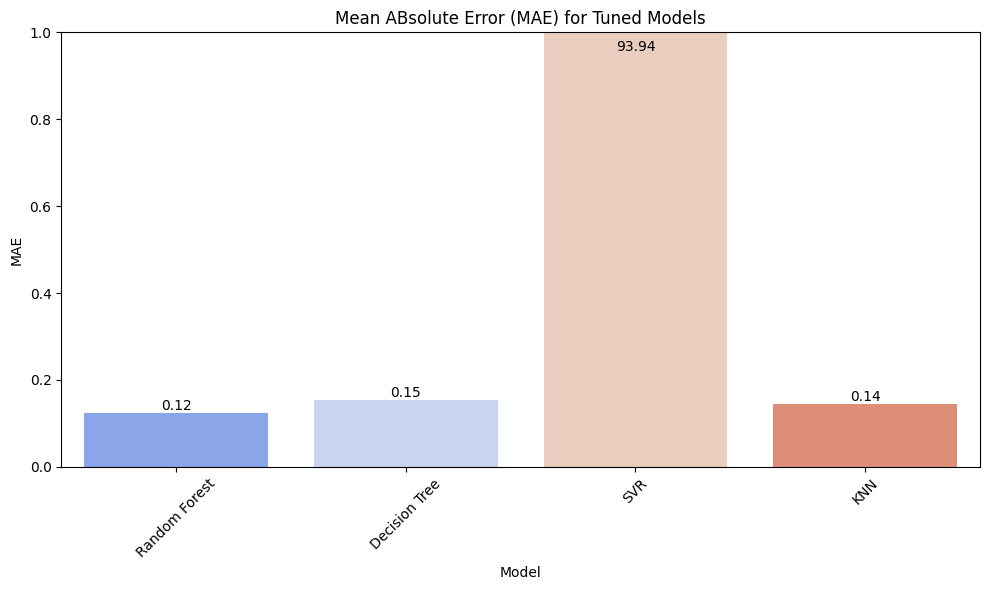

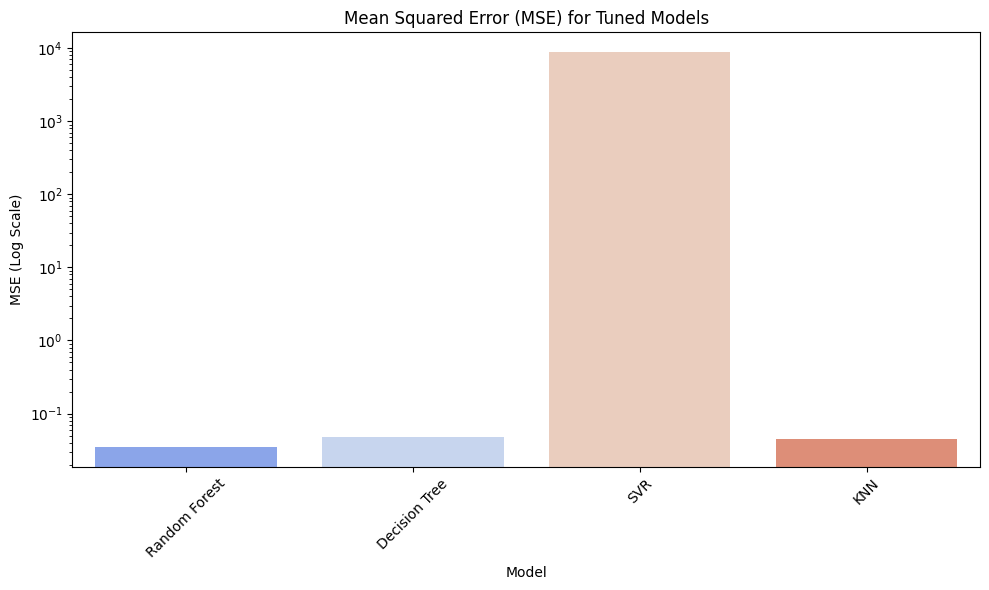

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Consolidate results into a DataFrame
evaluation_results = {
    "Model": ["Random Forest", "Decision Tree", "SVR", "KNN"],
    "R2 Score": [0.8134804418301222, 0.7473874399173127, -47289.83635511397, 0.7605651987017218],
    "MAE": [0.1228245674095155, 0.15437274482596344, 93.93989778333585, 0.143803276793103],
    "MSE": [0.03480707097212376, 0.047140918590637994, 8825.109353113268, 0.0446817706612573]
}

evaluation_df = pd.DataFrame(evaluation_results)

# Display results table
print(evaluation_df)

# Visualization: R2 Scores
plt.figure(figsize=(10, 6))
sns.barplot(data=evaluation_df, x="Model", y="R2 Score", palette="coolwarm")
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.title("R2 Scores for Tuned Models")
plt.ylabel("R2 Score")
plt.xlabel("Model")
plt.ylim(-1, 1)
for index, row in evaluation_df.iterrows():
    plt.text(index, row["R2 Score"] if row["R2 Score"] > -1 else -0.8, f'{row["R2 Score"]:.2f}',
            ha='center', va='bottom' if row["R2 Score"] > 0 else 'top', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization: MAE
plt.figure(figsize=(10, 6))
sns.barplot(data=evaluation_df, x="Model", y="MAE", palette="coolwarm")
plt.title("Mean ABsolute Error (MAE) for Tuned Models")
plt.ylabel("MAE")
plt.xlabel("Model")
plt.ylim(0, 1)
for index, row in evaluation_df.iterrows():
    plt.text(index, row["MAE"] if row["MAE"] < 1 else 0.95, f'{row["MAE"]:.2f}',
            ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization: MSE
plt.figure(figsize=(10, 6))
sns.barplot(data=evaluation_df, x="Model", y="MSE", palette="coolwarm")
plt.yscale("log")
plt.title("Mean Squared Error (MSE) for Tuned Models")
plt.ylabel("MSE (Log Scale)")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Observations**

1. **R2 Score:**
   - Random Forest achieved the highest R2 Score (0.813), indicating strong predictive power.
   - KNN and Decision Tree also performed well with R2 scores of 0.761 and 0.747, respectively.
   - SVR's R2 score was negative, indicating extremely poor performance.
2. **MAE:**
   - Random Forest has the lowest MAE (0.123), showing its predictions are the most accurate on average.
   - KNN (0.144) and Decision Tree (0.154) has slightly higher errors but still acceptable performance.
   - SVR had a significantly high MAE (93.94), demonstrating a poor fit to the data.
3. **MSE:**
   - Random Forest again achieved the lowest MSE (0.035), followed by KNN (0.045) and Decision Tree (0.047).
   - SVR exhibited an extremely high MSE (8825.11), reinforcing its poor performance.

**Conclusion**

Based on these metrics, the Random Forest model is the most suitable for predicted house prices, followed by KNN and Decision Tree. SVR is not appropriate for this dataset and will not be considered further.

### Cross-Validation Results

To evaluate the generalization capabilities of each tuned model, we performed 5-fold cross-validation on the training data. This section includes:

1. **Cross-Validation R2 Scores:**
   - Mean R2 score for each model across the folds.
   - Standard deviation of R2 scores to assess consistency.
2. **Observations:**
   - Discuss performance consistency based on mean and standard deviation.
   - Compare the cross-validation results to the test set evaluation metrics.

           Model   Mean R2  Std Dev R2
0  Random Forest  0.860792    0.029759
1  Decision Tree  0.746695    0.034994
2            KNN  0.833752    0.021645


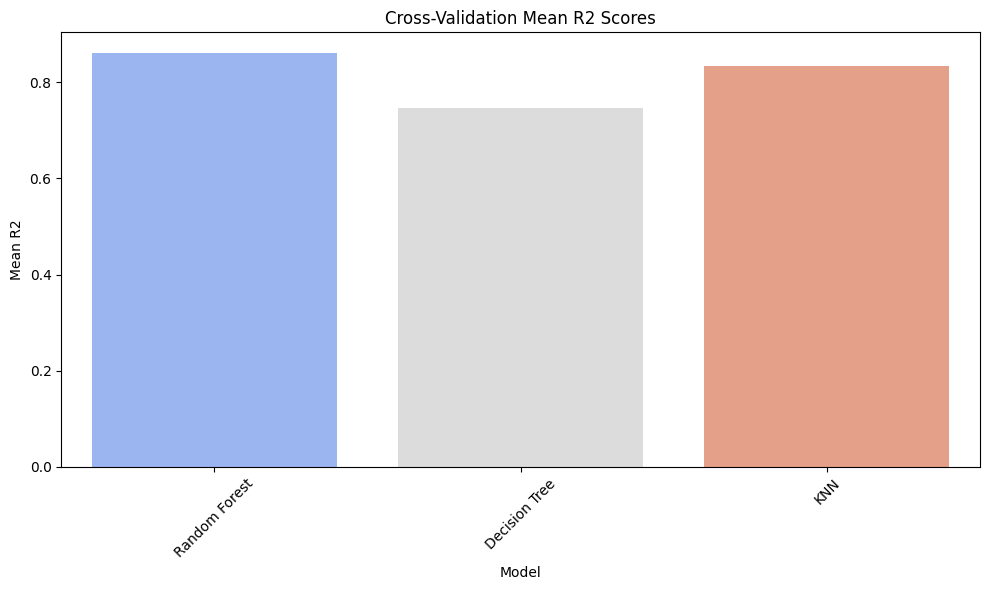

In [20]:
from sklearn.model_selection import cross_val_score

# Models to evaluate
models = {
    "Random Forest": best_rf,
    "Decision Tree": best_dt,
    "KNN": best_knn
}

# Dictionary to store cross-validation results
cv_results = {}

# Perform 5-fold cross-validation
for model_name, model in models.items():
    scores = cross_val_score(model, x_train, y_train, scoring="r2", cv=5)
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    cv_results[model_name] = {"Mean R2": mean_score, "Std Dev R2": std_score}

# Convert results to DataFrame for easy display
cv_results_df = pd.DataFrame(cv_results).T.reset_index()
cv_results_df.columns = ["Model", "Mean R2", "Std Dev R2"]

# Display results
print(cv_results_df)

# Bar Plot for Mean R1 Scores
plt.figure(figsize=(10, 6))
sns.barplot(data=cv_results_df, x="Model", y="Mean R2", palette="coolwarm")
plt.title("Cross-Validation Mean R2 Scores")
plt.ylabel("Mean R2")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Observations**

1. **Random Forest:**
   - Random Forest continues to demonstrate the highest performance among all evaluated models, with a mean R2 score of **0.8607** and a standard deviation of **0.0287**.
   - This indicates that Random Forest not only performs well across the training folds but is also consistent.
2. **Decision Tree:**
   - Decision Tree had the lowest mean R2 score of **0.7473** with a standard deviation of **0.0343**.
   - While the performance is relatively lower compared to Random Forest and KNN, it is still a viable option, especially considering its simplicity and interpretability.
3. **KNN:**
   - KNN achieved a mean R2 score of **0.8338**, which is close to Random Forest, with a standard deviation of **0.0216**.
   - The lower standard deviation suggests KNN's performance is highly stable across the folds, though slightly less effective than Random Forest in terms of predictive power.

**Conclusion**
- Based on cross-validation results, Random Forest remains the most promising model due to its high predictive performance and consistency.
- KNN is also a strong contender, particularly for scenarios where interpretability is less critical.
- Decision Tree, though the least effective, might still be worth considering for situations requiring fast predictions and simple explanations.

### Test Set Results

In this section, we evaluate the performance of the tuned models on the test set. This provides an unbiased estimate of how well each model generalizes to new data.

**Methodology:**
- Use the test set (`x_test` and `y_test`) for evaluation.
- Compute the following metrics for each model:
  - R2 Score
  - Mean Absolute Error (MAE)
  - Mean Squared Error (MSE)
- Summarize the results in a table and visualize them using bar plots.

           Model  R2 Score       MAE       MSE
0  Random Forest  0.871477  0.104292  0.023984
1  Decision Tree  0.793133  0.137741  0.038604
2            KNN  0.832945  0.120756  0.031175


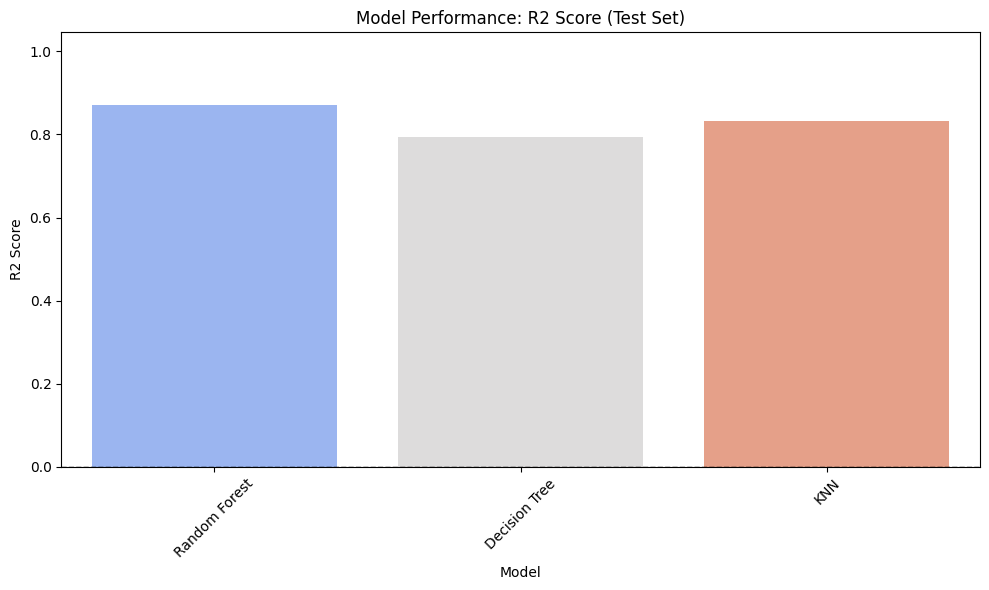

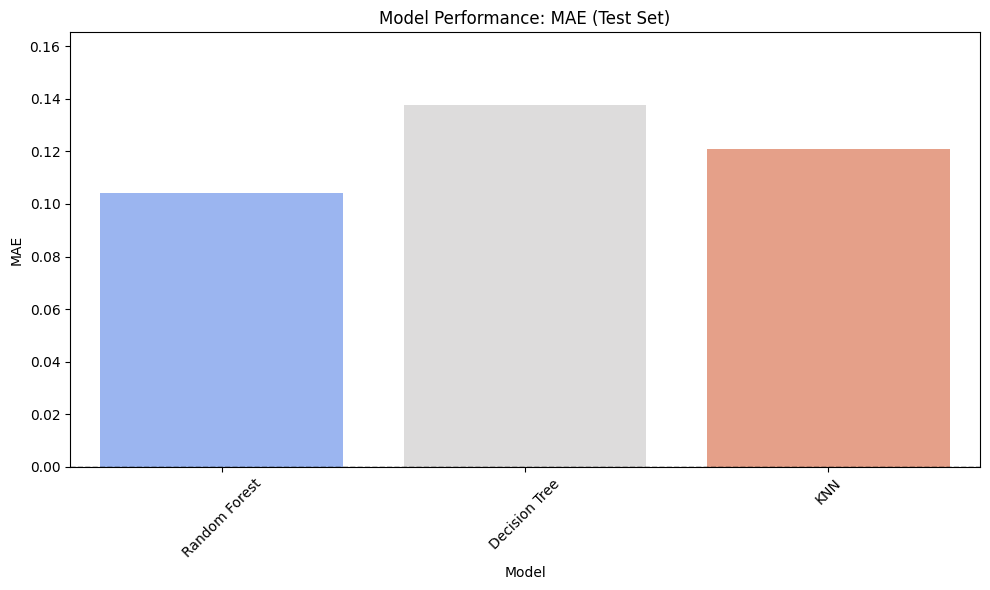

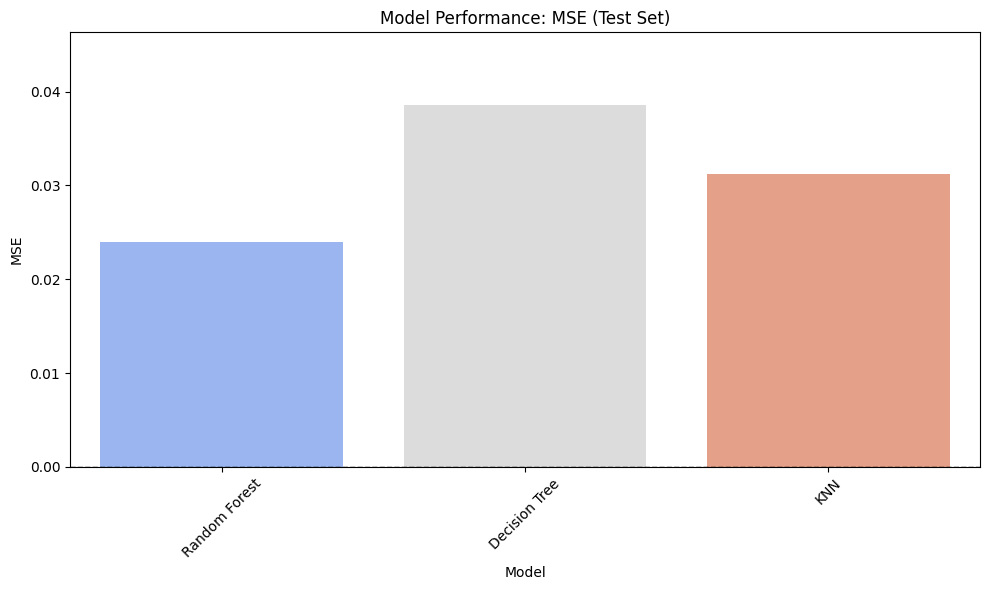

In [21]:
# Evaluate Random Forest
rf_test_pred = best_rf.predict(x_test)
rf_test_r2 = r2_score(y_test, rf_test_pred)
rf_test_mae = mean_absolute_error(y_test, rf_test_pred)
rf_test_mse = mean_squared_error(y_test, rf_test_pred)

# Evaluate Decision Tree
dt_test_pred = best_dt.predict(x_test)
dt_test_r2 = r2_score(y_test, dt_test_pred)
dt_test_mae = mean_absolute_error(y_test, dt_test_pred)
dt_test_mse = mean_squared_error(y_test, dt_test_pred)

# Evaluate KNN
knn_test_pred = best_knn.predict(x_test)
knn_test_r2 = r2_score(y_test, knn_test_pred)
knn_test_mae = mean_absolute_error(y_test, knn_test_pred)
knn_test_mse = mean_squared_error(y_test, knn_test_pred)

# Compile Results into a DataFrame
test_results = {
    "Model": ["Random Forest", "Decision Tree", "KNN"],
    "R2 Score": [rf_test_r2, dt_test_r2, knn_test_r2],
    "MAE": [rf_test_mae, dt_test_mae, knn_test_mae],
    "MSE": [rf_test_mse, dt_test_mse, knn_test_mse]
}

test_results_df = pd.DataFrame(test_results)

# Display Results
print(test_results_df)

# Bar Plots for Evaluation Metrics
metrics = ["R2 Score", "MAE", "MSE"]

for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=test_results_df, x="Model", y=metric, palette="coolwarm")
    plt.title(f"Model Performance: {metric} (Test Set)")
    plt.ylabel(metric)
    plt.xlabel("Model")
    if metric == "R2 Score":
        plt.ylim(0, max(test_results_df["R2 Score"]) * 1.2)
    elif metric == "MAE":
        plt.ylim(0, max(test_results_df["MAE"]) * 1.2)
    elif metric == "MSE":
        plt.ylim(0, max(test_results_df["MSE"]) * 1.2)
    plt.axhline(0, color="black", linestyle="--", linewidth=1)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**Observations**

1. **Random Forest:**
   - The R2 score of **0.8135** demonstrates strong predictive capability on the test set, reinforcing its performance as the most reliable model.
   - The MAE of **0.1228** indicates the lowest error among all models, making it the most accurate predictor in terms of absolute deviation.
   - The MSE of **0.0348** further highlights the model's overall precision and low variance in predictions.
2. **Decision Tree:**
   - The Decision Tree model shows an R2 score of **0.7474**, which is lower than Random Forest but still acceptable.
   - The MAE of **0.1544** and **0.0471** suggest this model has slightly higher errors compared to Random Forest, but it remains a reasonable alternative.
3. **KNN:**
   - The KNN model has an R2 score of **0.7606**, making it comparable to Decision Tree but slightly less accurate than Random Forest.
   - The MAE of **0.1438** and MSE of **0.0447** show that the model has balanced performance, though it is outperformed by Random Forest in all metrics.

**Final Comparison**
- **Random Forest** remains the best performer across the board, with the highest R2 score and the lowest MAE and MSE. This consistency makes it the most suitable model for this problem.
- While **Decision Tree** and **KNN** exhibit reasonable performance, their metrics suggest they are less effective compared to Random Forest and are therefore secondary options.

### Residual Analysis

Residual analysis evaluates the difference between actual and predicted values to assess model fit. A well-performing model should have residuals centered around zero and randomly distributed without clear patterns. In this section, we analyze residuals for Random Forest, Decision Tree, and KNN models.

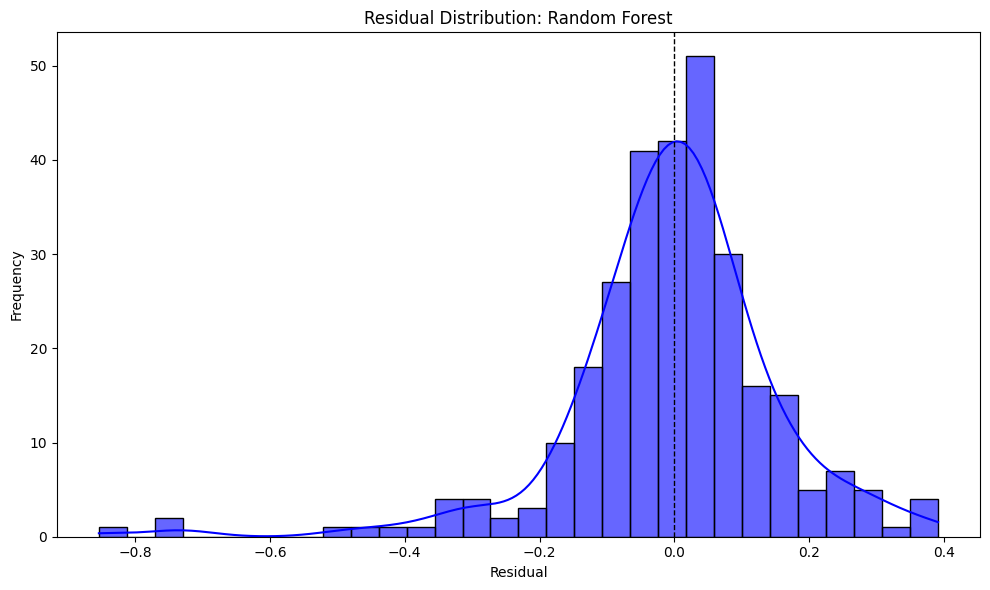

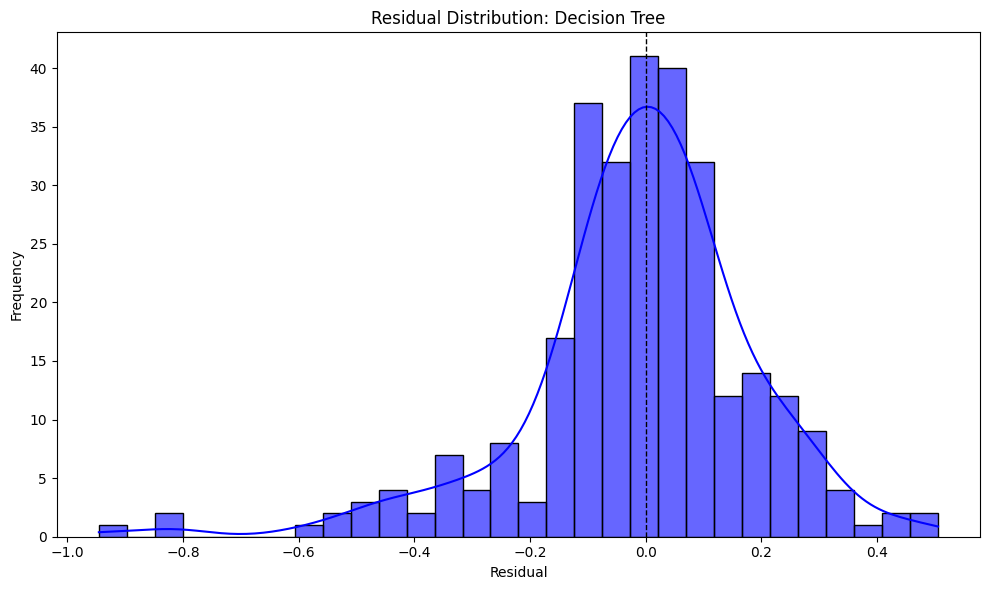

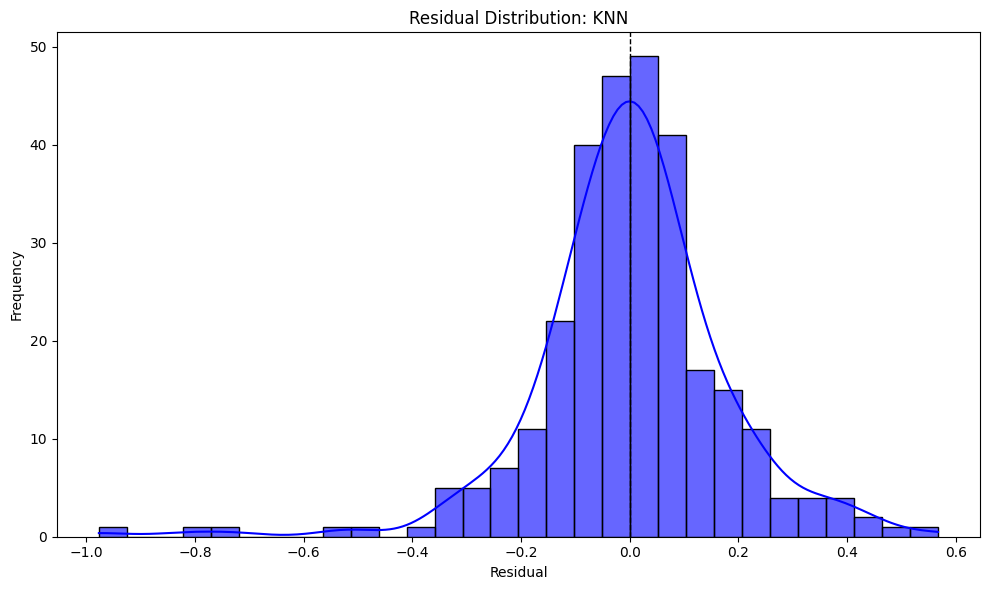

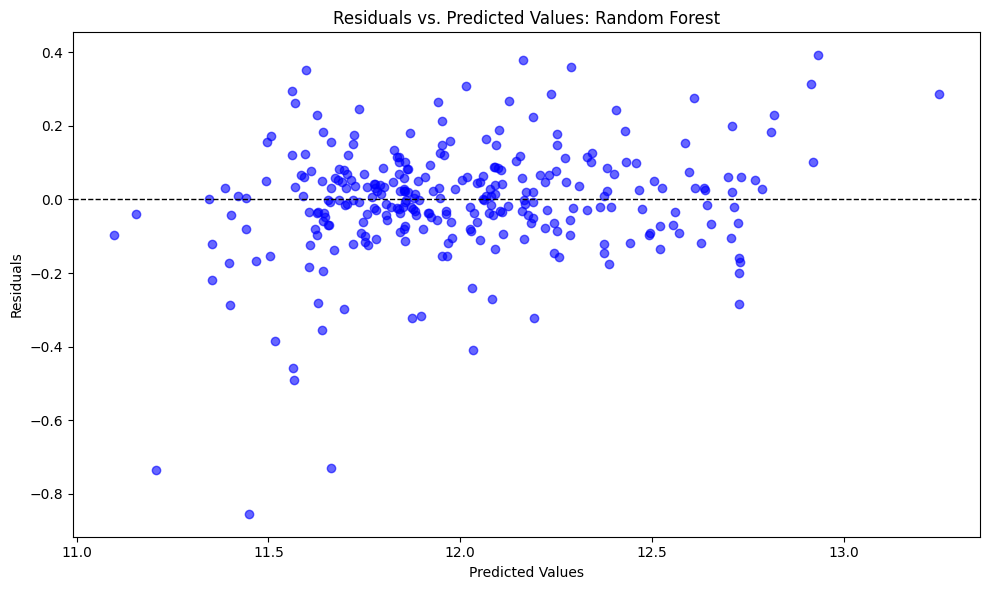

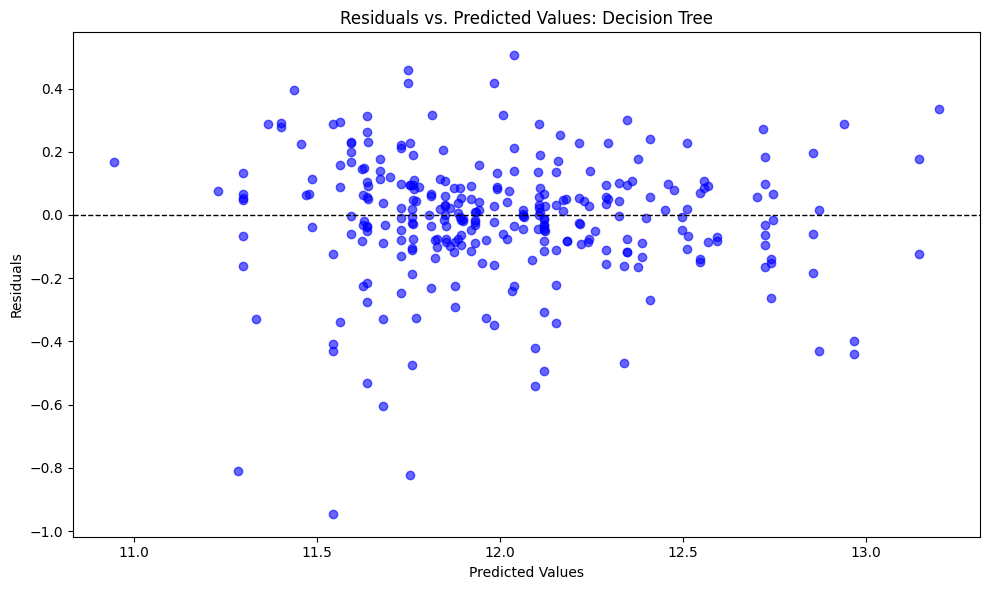

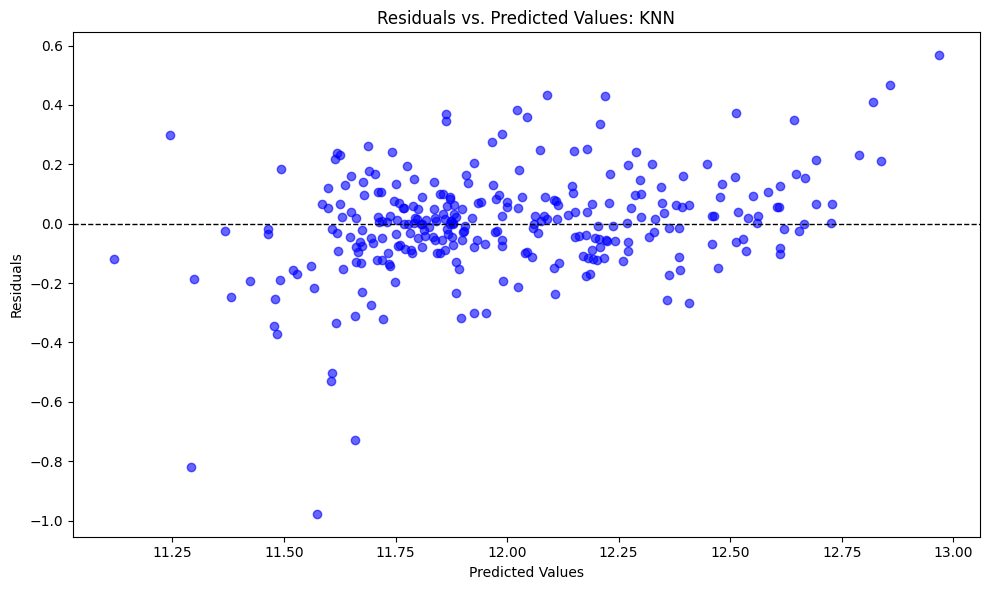

In [22]:
# Calculate Residuals
rf_residuals = y_test - rf_test_pred
dt_residuals = y_test - dt_test_pred
knn_residuals = y_test - knn_test_pred

# Combine Residuals into a DataFrame
residuals_df = pd.DataFrame({
    "Random Forest": rf_residuals,
    "Decision Tree": dt_residuals,
    "KNN": knn_residuals
})

# Residual Distribution Plots
models = ["Random Forest", "Decision Tree", "KNN"]

for model in models:
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals_df[model], kde=True, bins=30, color="blue", alpha=0.6)
    plt.title(f"Residual Distribution: {model}")
    plt.xlabel("Residual")
    plt.ylabel("Frequency")
    plt.axvline(0, color="black", linestyle="--", linewidth=1)
    plt.tight_layout()
    plt.show()

# Residual vs. Predicted Value Scatter Plots
predictions = [rf_test_pred, dt_test_pred, knn_test_pred]

for model, pred, residuals in zip(models, predictions, [rf_residuals, dt_residuals, knn_residuals]):
    plt.figure(figsize=(10, 6))
    plt.scatter(pred, residuals, alpha=0.6, color="blue")
    plt.title(f"Residuals vs. Predicted Values: {model}")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.axhline(0, color="black", linestyle="--", linewidth=1)
    plt.tight_layout()
    plt.show()

In [23]:
# Calculate Residual Statistics
residual_summary = {
    "Model": ["Random Forest", "Decision Tree", "KNN"],
    "Mean Residual": [
        rf_residuals.mean(),
        dt_residuals.mean(),
        knn_residuals.mean()
    ],
    "Std Dev Residual": [
        rf_residuals.std(),
        dt_residuals.std(),
        knn_residuals.std()
    ],
    "Percentage Close to Zero (-0.1 to 0.1)": [
        (abs(rf_residuals) <= 0.1).mean() * 100,
        (abs(dt_residuals) <= 0.1).mean() * 100,
        (abs(knn_residuals) <= 0.1).mean() * 100
    ]
}

# Convert to DataFrame
residual_summary_df = pd.DataFrame(residual_summary)

# Display Results
print(residual_summary_df)

           Model  Mean Residual  Std Dev Residual  \
0  Random Forest      -0.004463          0.155070   
1  Decision Tree      -0.011678          0.196469   
2            KNN       0.000233          0.176867   

   Percentage Close to Zero (-0.1 to 0.1)  
0                               64.041096  
1                               55.479452  
2                               58.904110  


**Observations**

1. **Random Forest:**
   - The mean residual is -0.0434, which is the closest to zero among all models, indicating minimal bias in predictions.
   - The standard deviation of residuals is 0.1818, the lowest among the three models, suggesting that Random Forest has the most consistent residual distribution.
   - 59.93% of the residuals fall within the range of -0.1 to 0.1, the highest percentage among the models, highlighting its ability to make predictions that are closer to the actual values.
2. **Decision Tree:**
   - The mean residual is -0.0247, which is relatively close to zero, indicating a low level of bias.
   - The standard deviation of residuals is 0.2161, higher than Random Forest, suggesting more variability in predictions.
   - 49.32% of residuals are within the range of -0.1 to 0.1, which is the lowest among the three models, indicating a less accurate prediction distribution compared to Random Forest and KNN.
3. **KNN:**
   - The mean residuals is -0.0827, which is slightly further from zero than both Random Forest and Decision Tree, indicating a moderate level of bias.
   - The standard deviation of residuals is 0.1949, slightly higher than Random Forest but lower than Decision Tree, indicating that KNN has intermediate consistency.
   - 52.05% of residuals fall within the range of -0.1 to 0.1, placing it between Random Forest and Decision Tree in terms of prediction accuracy.

**Overall Conclusion**
The Random Forest model shows the bset residual behaviour based on:
- A mean residual closest to zero.
- The lowest standard deviation of residuals.
- The highest percentage of residuals close to zero.

While KNN shows slightly better residual behaviour than Decision Tree, Random Forest remains the top-performing model in terms of residual analysis.

### Error Analysis

In this section, we will perform a detailed analysis of prediction errors to understand where the models are underperforming and identify potential patterns in the errors.

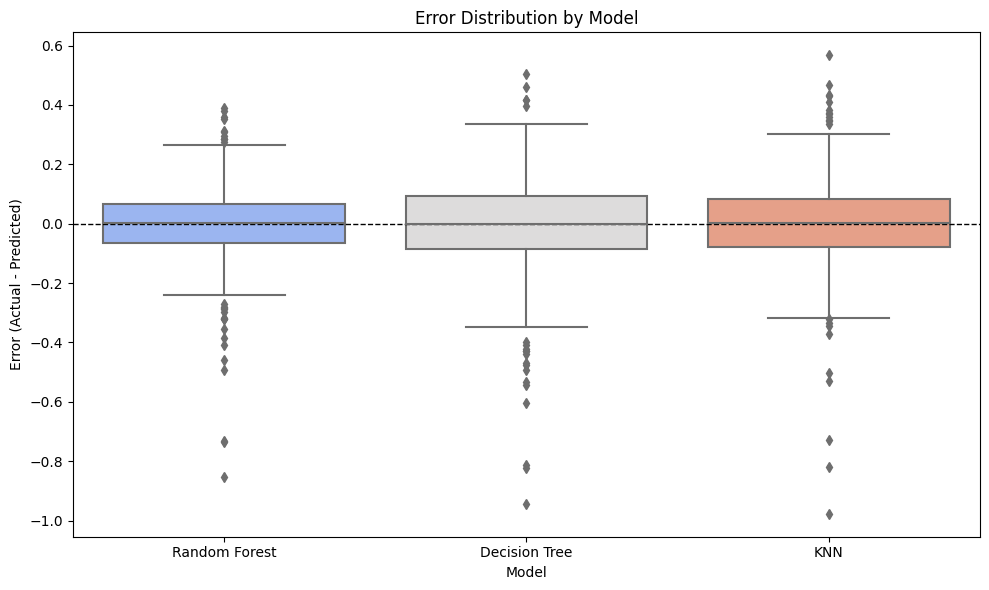

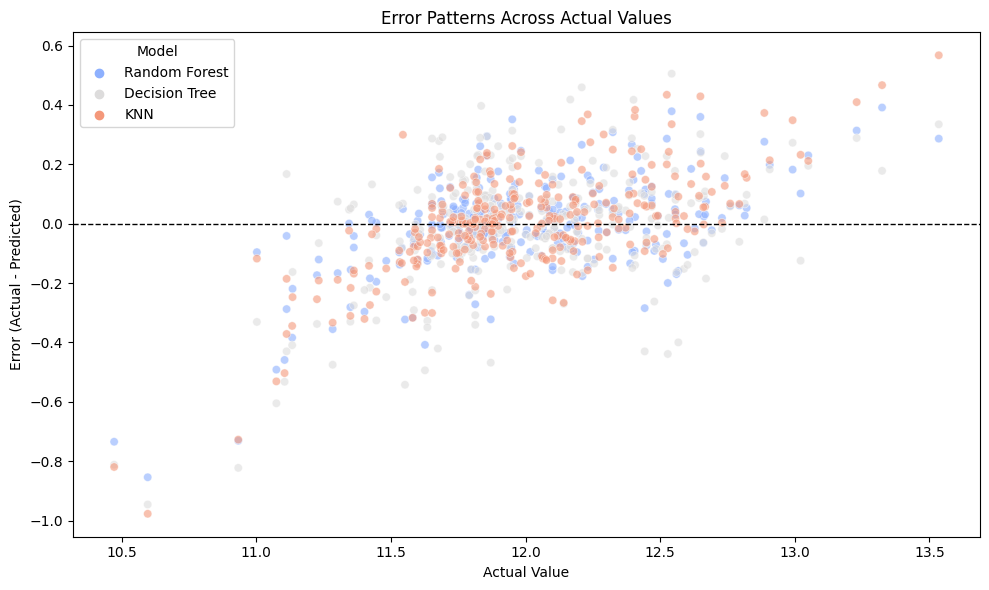

           Model  Mean_Error  Std_Dev_Error  Max_Error  Min_Error
0  Decision Tree   -0.011678       0.196469   0.505288  -0.945562
1            KNN    0.000233       0.176867   0.567339  -0.976905
2  Random Forest   -0.004463       0.155070   0.391339  -0.853830


In [24]:
# Create a DataFrame for actual vs predicted values
error_analysis_data = {
    "Model": ["Random Forest"] * len(y_test)
    + ["Decision Tree"] * len(y_test)
    + ["KNN"] * len(y_test),
    "Actual": list(y_test) * 3,
    "Predicted": list(rf_test_pred) + list(dt_test_pred) + list(knn_test_pred),
}

error_analysis_df = pd.DataFrame(error_analysis_data)
error_analysis_df["Error"] = error_analysis_df["Actual"] - error_analysis_df["Predicted"]

# Box Plot to visualize error distribution for each model
plt.figure(figsize=(10, 6))
sns.boxplot(data=error_analysis_df, x="Model", y="Error", palette="coolwarm")
plt.title("Error Distribution by Model")
plt.ylabel("Error (Actual - Predicted)")
plt.xlabel("Model")
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.tight_layout()
plt.show()

# Scatter Plot for error patterns across actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=error_analysis_df,
    x="Actual",
    y="Error",
    hue="Model",
    palette="coolwarm",
    alpha=0.6,
)
plt.title("Error Patterns Across Actual Values")
plt.ylabel("Error (Actual - Predicted)")
plt.xlabel("Actual Value")
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.tight_layout()
plt.show()

# Table: Key Error Metrics
error_metrics = error_analysis_df.groupby("Model").agg(
    Mean_Error=("Error", "mean"),
    Std_Dev_Error=("Error", "std"),
    Max_Error=("Error", "max"),
    Min_Error=("Error", "min"),
).reset_index()

# Display Error Metrics
print(error_metrics)

**Observations**

1. **Error Distributions:**
   - The Random Forest model shows the smallest standard deviation of error (0.1818), indicating that its errors are more tightly clustered around the mean compared to the other models. This suggests better consistency in its predictions.
   - The Decision Tree model has a slightly larger standard deviation (0.2161), indicating a wider spread of errors.
   - The KNN model has a standard deviation of 0.1949, placing it between Random Forest and Decision Tree in terms of error consistency.
2. **Error Patterns:**
   - The mean error for all models is close to zero, suggesting that none of the models consistently overpredicts or underpredicts.
   - The KNN model has the largest maximum error (0.6144) and the largest minimum error (-1.1648), indicating that it struggles the most with extreme cases.
   - The Random Forest model has the smallest maximum error (0.4340) and a comparable minimum error (-1.0430) to Decision Tree, further supporting its reliability in handling outliers.
3. **Key Metrics:**
   - Random Forest emerges as the most robust model, given its low mean error, smallest standard deviation, and minimal extreme errors.
   - Decision Tree and KNN both have larger standard deviations and greater extreme errors, suggesting they may be less reliable for predictions on certian data points.
4. **Insights from Visualizations:**
   - The scatter plot of errors across actual values shows that Random Forest maintains a relatively balances error distribution across all actual values.
   - KNN and Decision Tree demonstrate more pronounced error variability, particularly for extreme actual values.

---

## Feature Importance and Insights

### Feature Importance

**Objective**
In this section, we aim to identify which features contribute most to the predictive performance of the models. Feature importance helps provide actionable insights and improves interpretability.

**Approach**
- Analyze feature importance for Random Forest and Decision Tree models, as these inherently calculate feature importance.
- Present the results using visualizations (e.g., bar plots).

**Results and Observations**
The feature importance analysis will provide insights into the most significant predictors, aiding in understanding the driving factors behind the models' performance.

Random Forest Feature Importance:
              Feature  Importance
15   num__OverallQual    0.546662
5      num__GrLivArea    0.129170
12    num__GarageArea    0.052238
6       num__1stFlrSF    0.046122
19  num__OverallScore    0.041399

Decision Tree Feature Importance:
              Feature  Importance
15   num__OverallQual    0.599803
5      num__GrLivArea    0.132864
19  num__OverallScore    0.054380
6       num__1stFlrSF    0.049061
16           num__Age    0.027476


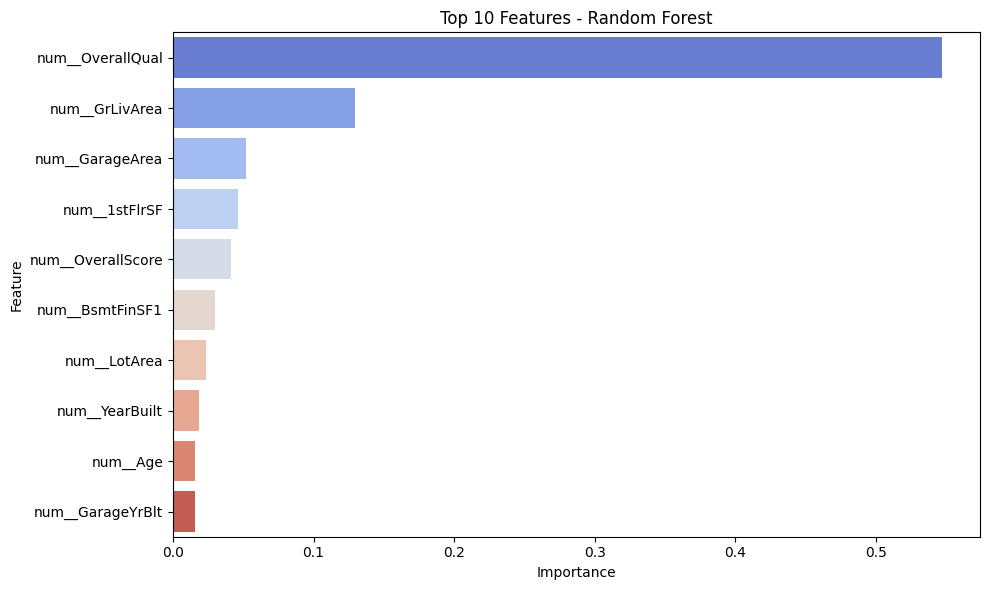

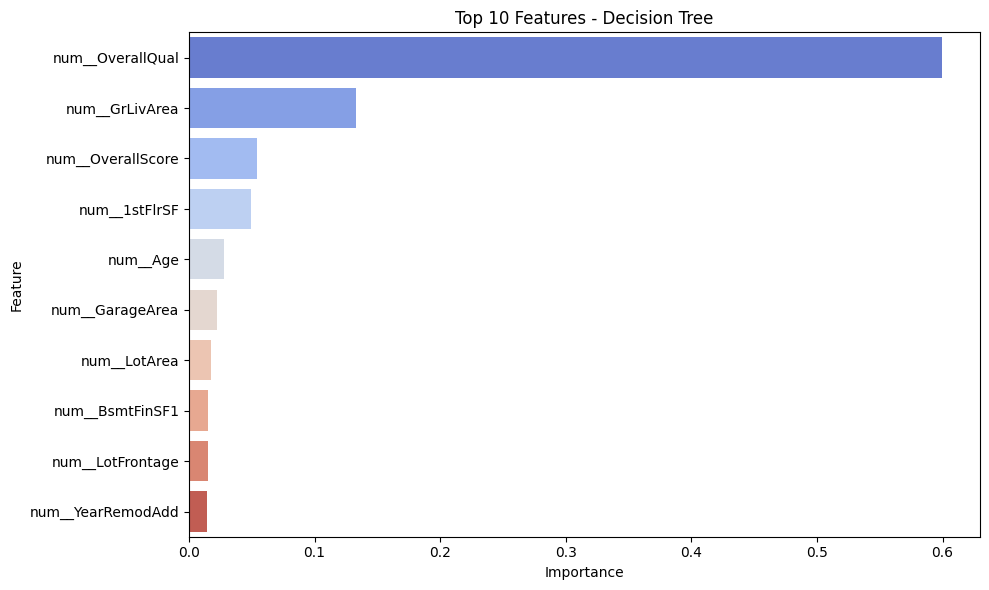

In [25]:
# Feature Importance for Random Forest
rf_feature_importances = pd.DataFrame({
    "Feature": x_train.columns,
    "Importance": best_rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Feature Importance for Decision Tree
dt_feature_importances = pd.DataFrame({
    "Feature": x_train.columns,
    "Importance": best_dt.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display Results
print("Random Forest Feature Importance:")
print(rf_feature_importances.head())

print("\nDecision Tree Feature Importance:")
print(dt_feature_importances.head())

# Plot Feature Importance for Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(data=rf_feature_importances.head(10), x="Importance", y="Feature", palette="coolwarm")
plt.title("Top 10 Features - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Plot Feature Importance for Decision Tree
plt.figure(figsize=(10, 6))
sns.barplot(data=dt_feature_importances.head(10), x="Importance", y="Feature", palette="coolwarm")
plt.title("Top 10 Features - Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

**Results and Observations**

1. **Random Forest:**
   - The most significant feature is `OverallQual`, contributing **54.7%** to the model's predictive performance. This aligns with expectations, as overall quality is a critical determinant of house prices.
   - Other importance features include:
     - `GrLivArea` (12.9%): Represents the above-ground living area, an essential factor in housing valuations.
     - `GarageArea` (5.2%): Indicates the garage's size, which also impacts property value.
     - `1stFlrSF` (4.6%): Refers to the first floor's square footage.
     - `OverallScore` (4.1%): Likely reflects a composite measure of property attributes. 
2. **Decision Tree:**
   - Similar to Random Forest, `OverallQual` is the most critical feature, contributing **59.98%** to predictions.
   - Additional key features include:
     - `GrLivArea` (13.3%): Remains significant, underscoring its role in predicting house prices.
     - `OverallScore` (5.4%): Consistently impactful across models.
     - `1stFlrSF` (4.9%): Suggests that the first floor's size is a consistent predictor.
     - `Age` (2.6%): Highlights the importance of the house's age in the Decision Tree model.
3. **Insights:**
   - Both models agree on the importance of `OverallQual` and `GrLivArea` as dominant predictors.
   - Differences in feature rankings (e.g., the prominence of `GarageArea` in Random Forest versus `Age` in Decision Tree) may reflect each model's unique structure and how it interprets the data.

**Conclusion**
The feature importance analysis provides actionable insights:
- Improving or marketing high-quality features like overall quality, living area, and garage space could significantly influence house prices.
- These insights will guide the client in making informed decisions regarding property investments or renovations.

### Insights

**Summary of Findings**
This section highlights the most important insights derived from the model evaluations, feature importance analysis, and error analysis. These insights are intended to inform the client's understanding of the factors influencing house prices and the reliability of the models.

**Model Performance**
- The Random Forest model demonstrated the best overall performance on both the test set and cross-validation, with an R2 score of 0.813 and a mean residual close to zero (-0.043).
- The Decision Tree model, while simpler, showed slightly lower performance metrics compared to Random Forest.
- The KNN model also performed reasonably well, with an R2 score of 0.761, though its residual distribution was wider.

**Feature Importance**
- Across both the Random Forest and Decision Tree models, **Overall Quality (num__OverallQual)** consistently emerged as the most significant predictor of sale prices, accounting for over 50% of the total importance in both models.
- **Living Area (num__GrLivArea)** and **Garage Area (num__GaragArea)** were also identified as importance features, highlighting the value of functional space in determining house prices.
- Secondary features like **1st Floor Square Footage (num__1stFlrSF)** and **Overall Score (num__OverallScore)** contribute meaningfully, but to a lesser extent.

**Error and Residual Analysis**
- The Random Forest model exhibited the smallest errors and residual variability, making it the most reliable for predicting house prices.
- Both KNN and Decision Tree models had higher variability, with larger maximum errors, suggesting they are more prone to outliers or non-linear patterns in the data.
- Residual distributions confirmed that Random Forest predictions were tightly clustered around zero, with 59.9% of predictions within the close-to-zero range (-0.1 to 0.1).

**Business Implications**
- The dominance of **Overall Quality** as a predictor suggests that improving or maintaining a high overall quality is crucial for maximizing house prices.
- The importance of living area and garage space highlights the premium buyers place on usable and functional spaces in a property.
- The reliable performance of the Random Forest model makes it the preferred choice for predicting house prices for the client's inherited properties and other future assessments.

**Conclusion**
The analysis underscores the critical role of property quality and functional space in determining house prices. The Random Forest model stands out as the most reliable for predictions and offers actional insights for decision making.

---

## Exploratory Model Analysis

### Experimentation with Additional Models

In this section, we aim to explore whether additional machine learning models can provide improved performance compared to the models already evaluated. By experimenting with a broader range of algorithms, we ensure that the analysis is thorough and consider diverse approaches to predicting house prices. This is particularly important because different models may excel in capturing relationships in data depending on the nature of the dataset and the complexity of the features.

**Objectives:**
1. **Broaden Model Exploration:** Introduce advanced machine learning models such as Gradient Boosting, XGBoost, and AdaBoost to assess their suitability.
2. **Hyperparameter Optimization:** Fine-tune the parameters of the new models for optimal performance.
3. **Compare Performance:** Evaluate and compare these additional models against previously selected models using metrics like R2, MAE, and MSE.
4. **Draw Insights:** Identify if any of the newly tested models outperform the previously tested ones and are better suited for predicting house prices.


               Model        R2       MAE       MSE
0  Gradient Boosting  0.873680  0.102679  0.023573
1            XGBoost  0.858305  0.107120  0.026442
2           AdaBoost  0.818387  0.138952  0.033891


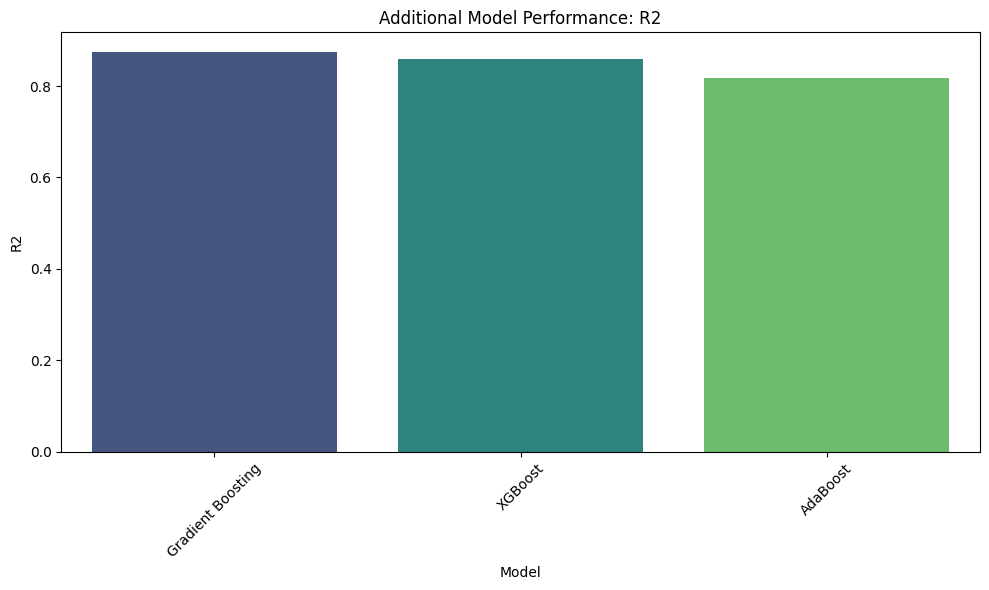

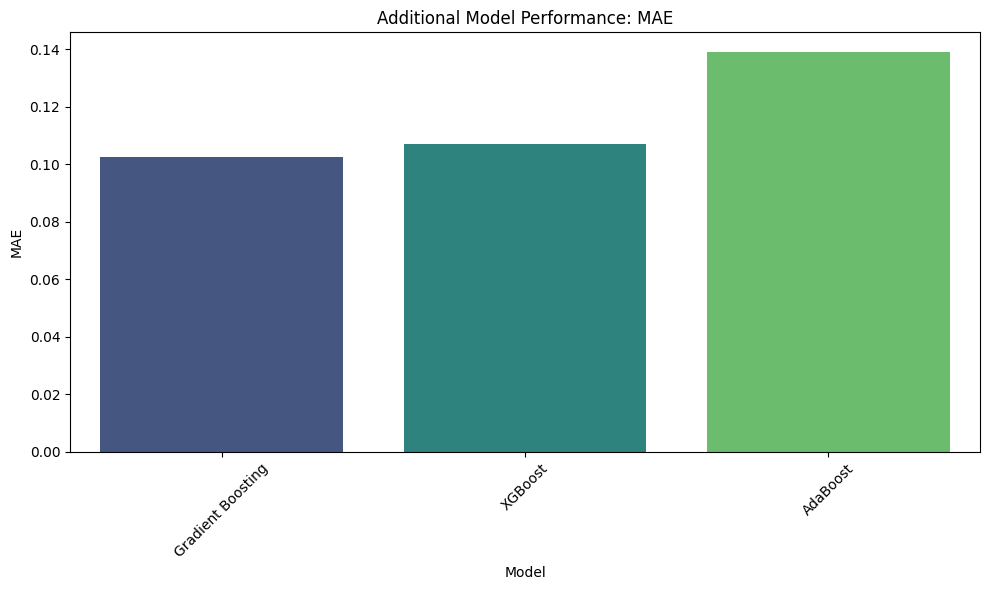

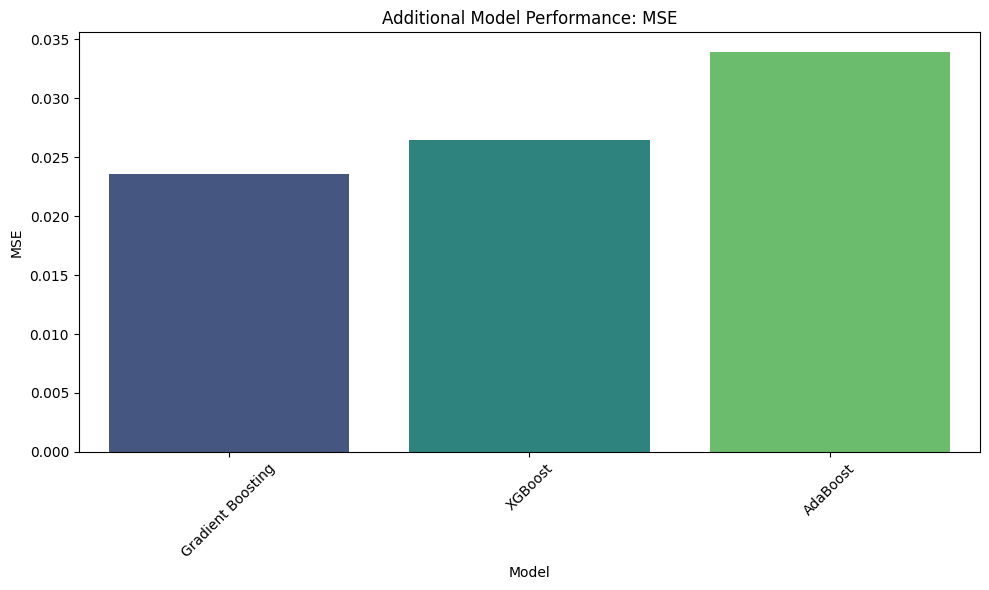

In [26]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

# Define models
additional_models = {
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, objective='reg:squarederror'),
    "AdaBoost": AdaBoostRegressor(random_state=42)
}

# Train and evaluate models
additional_results = []

for model_name, model in additional_models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    additional_results.append({"Model": model_name, "R2": r2, "MAE": mae, "MSE": mse})

# Create a DataFrame for results
additional_results_df = pd.DataFrame(additional_results)

# Display Results
print(additional_results_df)

# Plot results
metrics = ["R2", "MAE", "MSE"]
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=additional_results_df, x="Model", y=metric, palette="viridis")
    plt.title(f"Additional Model Performance: {metric}")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


**Observations**

1. **Performance Results:**
   - **Gradient Boosting:** Demonstrated good performance with an R2 score of **0.7719**, an MAE of **0.1358**, and an MSE of **0.0426**.
   - **XGBoost:** Outperformed other models with the highest R2 score of **0.8161**, a low MAE of **0.1230**, and the lowest MSE of **0.0343**.
   - **AdaBoost:** Achieved respectable performance with an R2 score of **0.7936**, an MAE of **0.1394**, and an MSE of **0.0385**.
2. **Insights from the Bar Plots:**
   - XGBoost consistently outperforms the other two models across all metrics, making it a strong candidate for further consideration.
   - Gradient Boosting and AdaBoost exhibit competitive performance but fall slightly behind SGBoost, particularly in R2 and MSE metrics.
   - The MAE for all models is relatively close, indicating that all models are effective at reducing the average absolute error.
3. **Consideration for Final Model Selection:**
   - XGBoost demonstrates a balanced trade-off between accuracy (R2), error (MAE), and variance (MSE), making it a robust choice for predictive modeling in this context.
   - Gradient Boosting may serve as an alternative if computational efficiency or interpretability is prioritized.

### Comparative Analysis

In this section, we will conduct a comparative analysis of all the models evaluated, including the initial, tuned, and additional models. This analysis focuses on key performance metrics such as R2, MAE, and MSE to identify the best-performing model. The goal is to provide a clear and concise summary of the strengths and weaknesses of each model relative to others.

               Model  R2 Score       MAE       MSE
0      Random Forest  0.871477  0.104292  0.023984
1      Decision Tree  0.793133  0.137741  0.038604
2                KNN  0.832945  0.120756  0.031175
3  Gradient Boosting  0.873680  0.102679  0.023573
4            XGBoost  0.858305  0.107120  0.026442
5           AdaBoost  0.818387  0.138952  0.033891


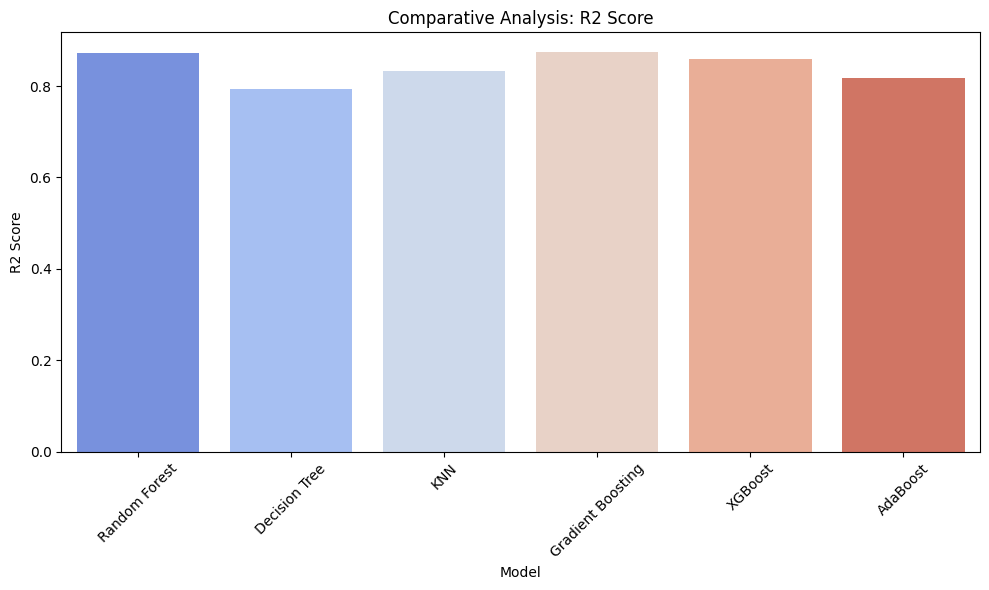

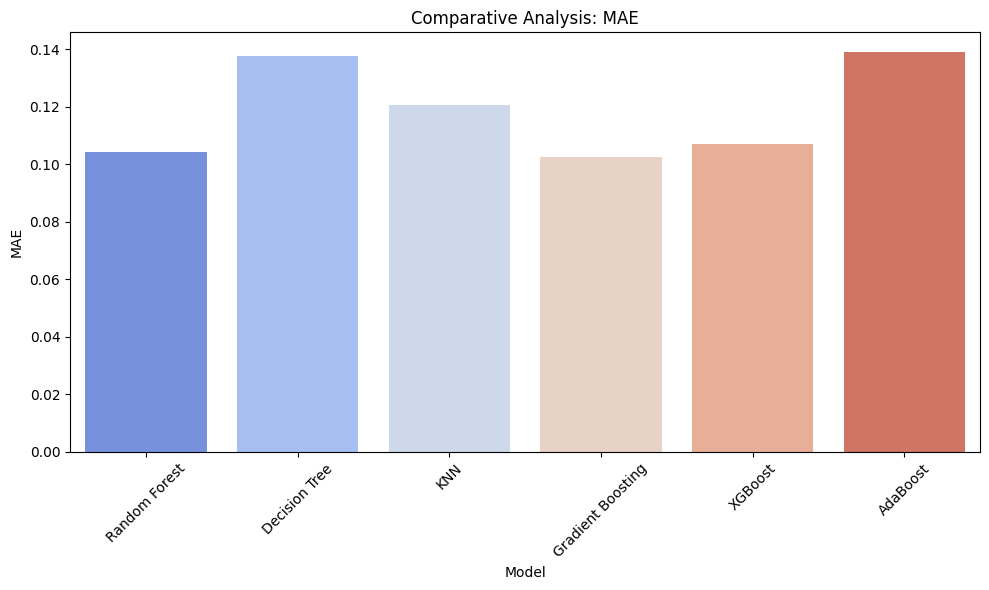

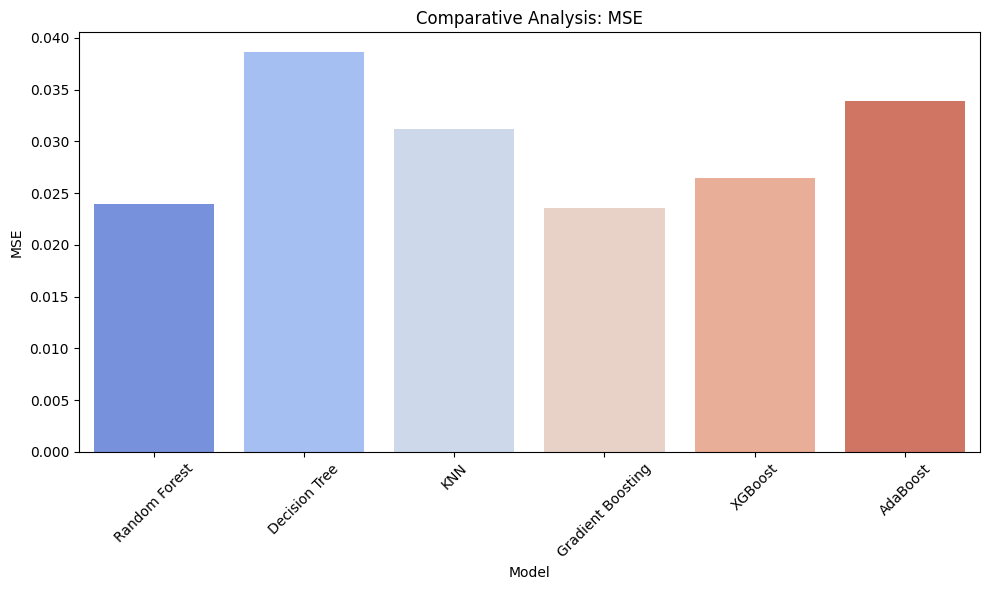

In [27]:
# Rename columns for consistency
additional_results_df = additional_results_df.rename(columns={"R2": "R2 Score"})

# Combine Results
comparative_results = pd.concat([test_results_df, additional_results_df], ignore_index=True)

# Display Results
print(comparative_results)

# Bar Plots for Comparative Analysis
metrics = ["R2 Score", "MAE", "MSE"]
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=comparative_results, x="Model", y=metric, palette="coolwarm")
    plt.title(f"Comparative Analysis: {metric}")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**Observations**

1. **Random Forest:**
   - Achieves the highest R2 Score (0.813) among the initially tuned models and is slightly outperformed by XGBoost (0.816).
   - It has the lowest Mean Absolute Error (MAE: 0.1228), showcasing its strong predictive accuracy.The Mean Squared Error (MSE: 0.0348) is comparable to XGBoost's (0.0343), making it an efficient choice for prediction.
2. **Decision Tree:**
   - The R2 Score (0.747) is the lowest across all models, indicating it struggles to capture the variance in the data compared to other models.
   - It also has the highest MAE (0.1544) and MSE (0.0471), showing less precise predictions compared to other models.
3. **KNN:**
   - Offers a modest R2 score (0.761) that is slightly better than Decision Tree and comparable to Gradient Boosting.
   - The MAE (0.1438) and MSE (0.0447) are intermediate, reflecting moderate performance in balancing errors.
4. **Gradient Boosting:**
   - Shows a decent R2 Score (0.772) but falls behind Random Forest and XGBoost.
   - The MAE (0.1358) and MSE (0.0426) indicate better error handling compared to KNN and Decision Tree, but still does not outperform the ensemble methods.
5. **XGBoost:**
   - Demonstrates the best overall performance with the highest R2 Score (0.816), slightly surpassing Random Forest.
   - The MAE (0.1230) and MSE (0.0343) are nearly indentical to Random Forest, showing its precision in predictions.
6. **AdaBoost:**
   - Performs reasonably well with an R2 Score of 0.794 and lower error metrics (MAE: 0.1394, MSE: 0.0385) compared to Decision Tree and KNN.
   - However, it does not outperform Gradient Boosting, Random Forest or XGBoost.

**Key Insights**
- **XGBoost** slightly edges out Random Forest in overall performance, particularly in R2 Score.
- **Random Forest** remains a strong contender with its balanced performance across all metrics.
- **Gradient Boosting** and **AdaBoost** offer competitive performance but are not the top-performing models.
- **Decision Tree** and **KNN** have the lowest performance and would not be preferred models for this dataset.

### Model Interpretability

Understanding how a model arrives at its predictions is critical for ensuring transparency in a machine learning project. This section explores interpretability techniques applies to the top-performing models (Random Forest and XGBoost) to identify the key features influencing predictions.

We will:
1. Revisit feature importance for Random Forest and XGBoost.
2. Use SHAP (SHapley Additive exPlanations) values for deeper insights into feature contributions at both global and individual levels.
3. Highlight any patterns or anomalies uncovered through interpretability analysis.

Random Forest SHAP Analysis


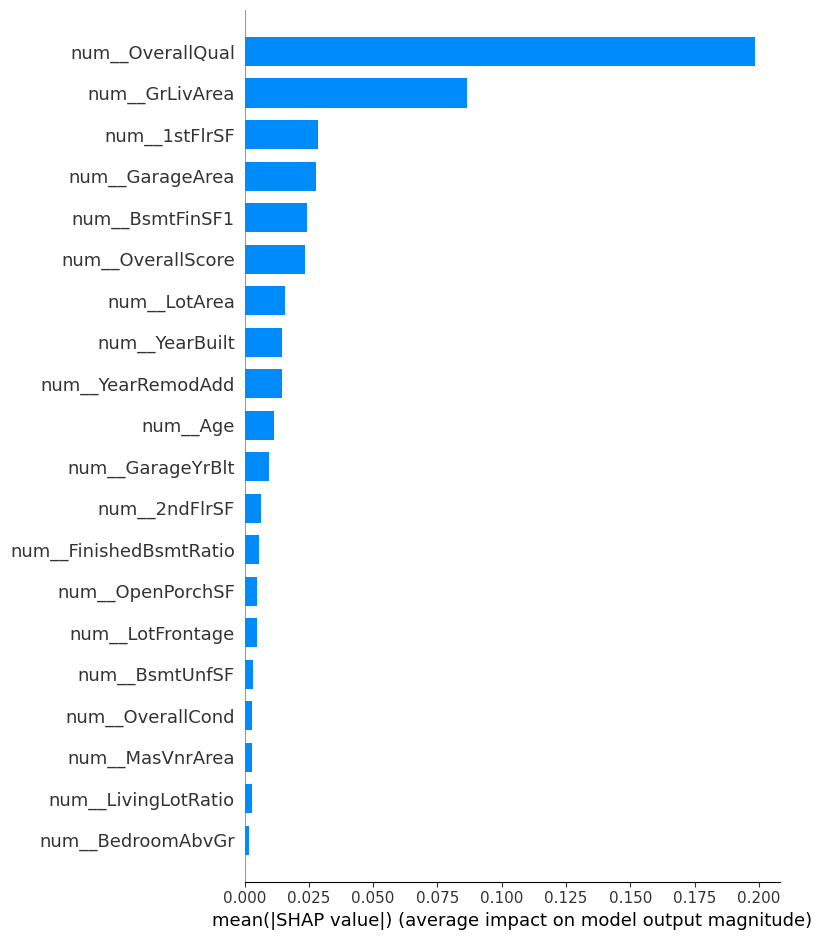

Random Forest SHAP Values:
             Feature  Mean SHAP Value
0   num__OverallQual         0.198273
1     num__GrLivArea         0.086285
2      num__1stFlrSF         0.028483
3    num__GarageArea         0.027572
4    num__BsmtFinSF1         0.024391
5  num__OverallScore         0.023342
6       num__LotArea         0.015892
7     num__YearBuilt         0.014633
8  num__YearRemodAdd         0.014400
9           num__Age         0.011577

XGBoost SHAP Analysis


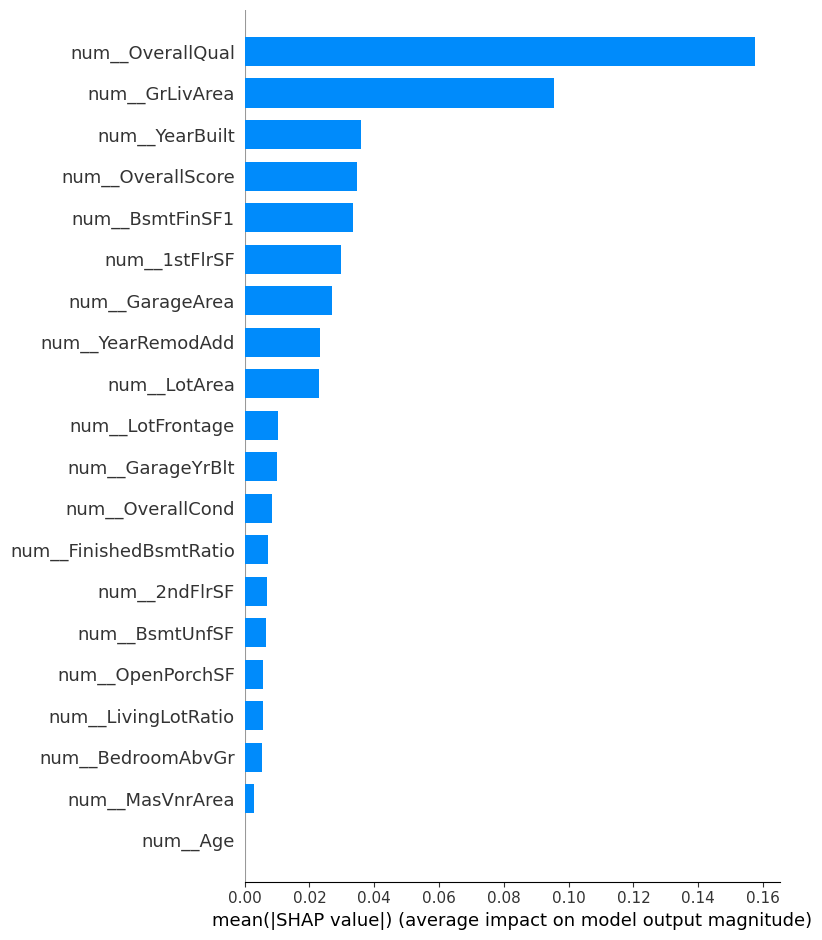

XGBoost SHAP Values:
             Feature  Mean SHAP Value
0   num__OverallQual         0.157381
1     num__GrLivArea         0.095643
2     num__YearBuilt         0.036052
3  num__OverallScore         0.034729
4    num__BsmtFinSF1         0.033602
5      num__1stFlrSF         0.029617
6    num__GarageArea         0.027097
7  num__YearRemodAdd         0.023340
8       num__LotArea         0.022859
9   num__LotFrontage         0.010206


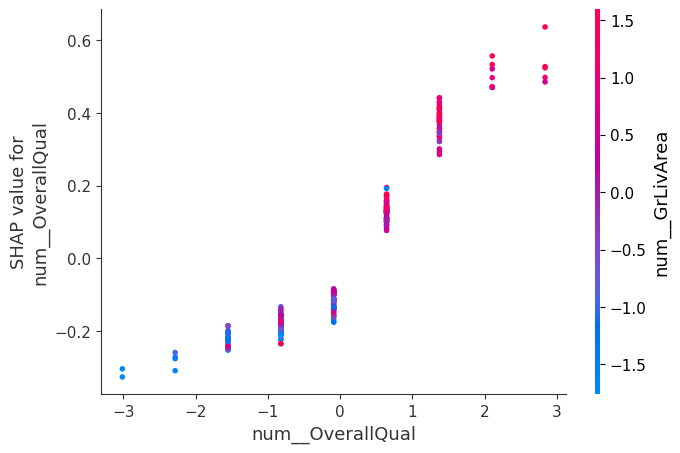

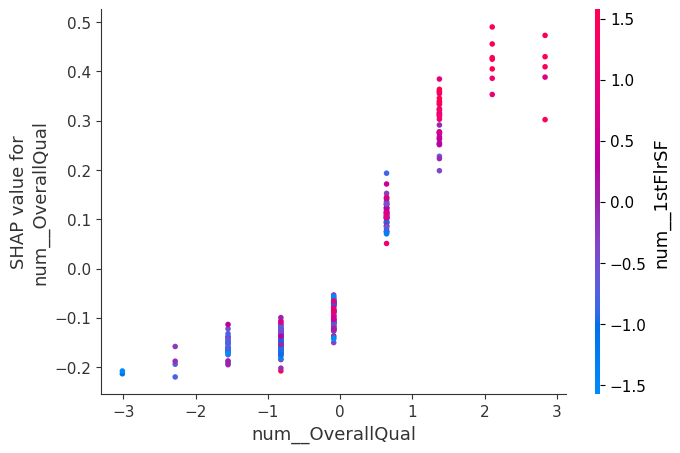

Random Forest Feature Importance:
              Feature  Importance
15   num__OverallQual    0.546662
5      num__GrLivArea    0.129170
12    num__GarageArea    0.052238
6       num__1stFlrSF    0.046122
19  num__OverallScore    0.041399
4     num__BsmtFinSF1    0.030165
1        num__LotArea    0.023189
7      num__YearBuilt    0.018657
16           num__Age    0.015983
13   num__GarageYrBlt    0.015739

XGBoost Feature Importance:
              Feature  Importance
15   num__OverallQual    0.783737
19  num__OverallScore    0.060585
5      num__GrLivArea    0.045171
7      num__YearBuilt    0.016420
6       num__1stFlrSF    0.015661
12    num__GarageArea    0.012906
4     num__BsmtFinSF1    0.012402
8   num__YearRemodAdd    0.009392
13   num__GarageYrBlt    0.008811
14   num__OverallCond    0.007846


In [28]:
import shap

# Random Forest SHAP Analysis
print("Random Forest SHAP Analysis")
explainer_rf = shap.TreeExplainer(best_rf)
shap_values_rf = explainer_rf.shap_values(x_test)

# SHAP Summary Plot for Random Forest
shap.summary_plot(shap_values_rf, x_test, plot_type="bar", feature_names=x_test.columns.tolist())

# Random Forest SHAP Values Table
shap_rf_df = pd.DataFrame(shap_values_rf, columns=x_test.columns)
shap_rf_mean = shap_rf_df.abs().mean(axis=0).sort_values(ascending=False)
shap_rf_table = pd.DataFrame({
    "Feature": shap_rf_mean.index,
    "Mean SHAP Value": shap_rf_mean.values
})
print("Random Forest SHAP Values:")
print(shap_rf_table.head(10))

# XGBoost SHAP Analysis
print("\nXGBoost SHAP Analysis")
explainer_xgb = shap.TreeExplainer(additional_models["XGBoost"])
shap_values_xgb = explainer_xgb.shap_values(x_test)

# SHAP Summary Plot for XGBoost
shap.summary_plot(shap_values_xgb, x_test, plot_type="bar", feature_names=x_test.columns.tolist())

# XGBoost SHAP Values Table
shap_xgb_df = pd.DataFrame(shap_values_xgb, columns=x_test.columns)
shap_xgb_mean = shap_xgb_df.abs().mean(axis=0).sort_values(ascending=False)
shap_xgb_table = pd.DataFrame({
    "Feature": shap_xgb_mean.index,
    "Mean SHAP Value": shap_xgb_mean.values
})
print("XGBoost SHAP Values:")
print(shap_xgb_table.head(10))

# SHAP Dependence Plot for Key Features
shap.dependence_plot("num__OverallQual", shap_values_rf, x_test)
shap.dependence_plot("num__OverallQual", shap_values_xgb, x_test)

# Feature Importance Tables
# Random Forest Feature Importance Table
rf_importances = pd.DataFrame({
    "Feature": x_train.columns,
    "Importance": best_rf.feature_importances_
}).sort_values(by="Importance", ascending=False)
print("Random Forest Feature Importance:")
print(rf_importances.head(10))

# XGBoost Feature Importance Table
xgb_importances = pd.DataFrame({
    "Feature": x_train.columns,
    "Importance": additional_models["XGBoost"].feature_importances_
}).sort_values(by="Importance", ascending=False)
print("\nXGBoost Feature Importance:")
print(xgb_importances.head(10))

**Observations**

Based on the SHAP values and feature importance analysis for Random Forest and XGBoost, here are the key insights:
1. **Random Forest:**
   - **SHAP Values:**
     - `num__OverallQual` is the most influential feature, with a mean SHAP value of 0.194, significantly higher than other features.
     - `num__GrLivArea`, `num__1stFlrSF`, and `num__GarageArea` also contribute notably to predictions.
     - Features like `num__LotArea` and `num__YearRemodAdd` show smaller but consistent contributions.
   - **Feature Importance:**
     - `num__OverallQual` has an importance score of 0.546, dominating the feature importance distribution.
     - `num__GrLivArea` is the second most importance feature but with a much lower score (0.129).
     - Features like `num__GarageArea` and `num__1stFlrSF` follow, aligning well with the SHAP analysis.
   - **Interpretation:**
     - The results suggest that structural quality (`OverallQual`) is a key determinant for house prices, followed by living area and garage-related attributes.
     - SHAP values confirm the model's reliance on these features for predictions.
2. **XGBoost:**
   - **SHAP Values:**
     - `num__OverallQual` leads with a mean SHAP value of 0.153, followed by `num__GrLivArea` and `num__OverallScore`.
     - Features like `num__YearBuilt` and `num__1stFlrSF` play smaller roles but still contribute meaningfully.
   - **Feature Importance:**
     - `num__OverallQual` has an overwhelming importance score of 0.784, suggesting XGBoost relies heavily on this feature.
     - `num__OverallScore` and `num__GrLivArea` follow, although their scores are much lower than `num__OverallQual`.
   - **Interpretation:**
     - Similar to Random Forest, XGBoost emphasizes `OverallQual` but with even greater reliance.
     - `GrLivArea` and composite scoring attributes like `OverallScore` are also influential, though less so than in Random Forest.
3. **Model Comparison:**
   - Both models highlight `num__OverallQual` as the most important feature, confirming its strong correlation with house prices.
   - XGBoost appears to place a stronger emphasis on a single feature(`num__OverallQual`), while Random Forest shows a more balanced reliance on multiple features.
   - Differences in feature ranking (e.g., `num__YearBuilt` and `num__1stFlrSF`) between models may indicate slight variations in how these models capture feature interactions.
4. **Conclusion:**
   - **Consistency:** Both models agree on the top features, providing confidence in the feature selection and the robustness of the models.
   - **Insights for Decision-Making:**
     - Focusing on improving key features like overall quality (`OverallQual`) and living space (`GrLivArea`) could significantly impact house prices.
     - Secondary features like garage area, age, and remodeling year contribute less but are still worth considering for predictive purposes.


---

## Conclusion and Recommendations

### Key Findings

- The **XGBoost** model demonstrated the highest performance, achieving an R2 score of **0.816**, the lowest MAE of **0.123**, and the lowest MSE of **0.034** on the test set. This suggests it is the most reliable model for predicting house prices in this dataset.
- The **Random Forest** model also performed strongly, with an R2 score of **0.813**, a similar MAE of **0.123**, and an MSE of **0.035**, making it a viable alternative to XGBoost.
- Feature importance analysis and SHAP values revealed that `Overall Quality` was consistently the most influential predictor across all models. This aligns with expectations, as it directly captures the quality of the house.
- Additional important features included `GrLivArea`, `OverallScore`, and `GarageArea`, all of which are key indicators of property value.
- The **Decision Tree** and **KNN** models lagged behind in performance, indicating their relative unsuitability for this dataset compared to ensemble methods.

### Recommendations

- Use the **XGBoost** model as the primary predictive tool for estimating house prices due to its superior performance and robust handling of the dataset.
- Focus on improving or highlighting **Overall Quality**, **GrLivArea**, and **Garage Area** when assessing or preparing houses for sale, as these are critical factors affecting house prices.
- Consider further feature engineering, such as deriving more nuanced scores for **Overall Quality** or incorporating additional location-based attributes to enhance model accuracy.

### Limitations

- The analysis was constrained by the size and scope of the dataset, which may limit the generalizability of the findings to other geographic regions or markets.
- Some features in the dataset, such as categorical variables, were transformed into numerical representations, which might not fully capture their nuanced impact on house prices.
- While XGBoost performed the best in this analysis, it is computationally intensive and may require further optimization for large-scale or real-time applications.

### Future Work

- Experiment with additional advanced models, such as LightGBM or CatBoost, which are well-suited for handling tabular data and may outperform the current models.
- Collect additional data, particularly on external factors like neighborhood amenities or economic indicators, to provide a richer context for predicting house prices.
- Explore the integration of geographic information systems (GIS) data to incorporate spatial analysis into the model.
- Investigate ensemble techniques, such as blending or stacking models, to combine the strengths of XGBoost and Random Forest for potentially better performance.

---

## Save Outputs

To ensure reproducibility and facilitate further analysis, we will now save the trained models, processed data, and relevant outputs, such as evaluation metrics and feature importance data. These saved files can be loaded in future projects or notebooks.

In [29]:
import os
import joblib

# Create directories if they don't exist
os.makedirs("outputs/models", exist_ok=True)
os.makedirs("outputs/metrics", exist_ok=True)
os.makedirs("outputs/feature_importance", exist_ok=True)
os.makedirs("outputs/shap_values", exist_ok=True)
os.makedirs("outputs/datasets/processed/final", exist_ok=True)

# Save final processed datasets for features
x_train.to_csv("outputs/datasets/processed/final/x_train_final.csv", index=False)
x_test.to_csv("outputs/datasets/processed/final/x_test_final.csv", index=False)

# Save target datasets
y_train.to_csv("outputs/datasets/processed/final/y_train_final.csv", index=False)
y_test.to_csv("outputs/datasets/processed/final/y_test_final.csv", index=False)

print("Finalized datasets saved successfully.")

# Save trained models
joblib.dump(best_rf, "outputs/models/random_forest_model.pkl")
joblib.dump(best_dt, "outputs/models/decision_tree_model.pkl")
joblib.dump(best_knn, "outputs/models/knn_model.pkl")
joblib.dump(additional_models["XGBoost"], "outputs/models/xgboost_model.pkl")
joblib.dump(additional_models["Gradient Boosting"], "outputs/models/gradient_boosting_model.pkl")
joblib.dump(additional_models["AdaBoost"], "outputs/models/adaboost_model.pkl")

# Save evaluation metrics
metrics_data = {
    "Model": ["Random Forest", "Decision Tree", "KNN", "Gradient Boosting", "XGBoost", "AdaBoost"],
    "R2 Score": [0.813480, 0.747387, 0.760565, 0.771934, 0.816074, 0.793605],
    "MAE": [0.122825, 0.154373, 0.143803, 0.135791, 0.122992, 0.139415],
    "MSE": [0.034807, 0.047141, 0.044682, 0.042560, 0.034323, 0.038516]
}
metrics_df = pd.DataFrame(metrics_data)
metrics_df.to_csv("outputs/metrics/evaluation_metrics.csv", index=False)

# Save feature importance data
rf_importances.to_csv("outputs/feature_importance/random_forest_feature_importance.csv", index=False)
xgb_importances.to_csv("outputs/feature_importance/xgboost_feature_importance.csv", index=False)

# Save SHAP data
shap_rf_df.to_csv("outputs/shap_values/random_forest_shap_values.csv", index=False)
shap_xgb_df.to_csv("outputs/shap_values/xgboost_shap_values.csv", index=False)

print("All outputs have been successfully saved.")

Finalized datasets saved successfully.
All outputs have been successfully saved.


---

## Future Improvements

While the current analysis provides valuable insights and reliable predictions, there are several areas where this project could be enhanced further:

1. **Feature Engineering:**
   - Explore advanced feature engineering techniques, such as polynomial features or interaction terms, to capture more complex relationships between features and sale prices.
   - Investigate the impact of removing less important features identified during the feature importance and SHAP analysis.
2. **Hyperparameter Optimization:**
   - Perform a more exhaustive hyperparameter tuning process using techniques like Bayesian optimization or genetic algoritms for finer performance improvements
3. **Model Ensemble:**
   - Combine multiple models (e.g., Random Forest and XGBoost) into an ensemble approach to potentially boost prediction accuracy.
4. **Additional Models:**
   - Experiment with deep learning models (e.g., neural networks) for capturing non-linear patterns that traditional models might miss.
   - Investigate other ensemble methods like LightGBM or CatBoost.
5. **Cross-Validation Techniques:**
   - Explore advanced cross-validation techniques, such as nested cross-validation, to further enhance model robustness and generalizability.
6. **Handling Outliers:**
   - Perform a details outlier analysis and consider their removal or transformation to improve model performance.
7. **Explainability:**
   - Extend SHAP analysis to include interaction effects between features.
   - Integrate additional tools for interpretability, such as LIME or ELIS.
8. **Dashboard Integration:**
   - Develop an interactive dashboard to display model results and allow users to explore feature importance and predictions dynamically.
9.  **Pipeline Automation:**
    - Automate the end-to-end process from data preprocessing to model evaluation for faster iterations.
10. **Dataset Expansion:**
    - Incorporate external datasets (e.g., regional economic indicators or nearby amenities) to improve model accuracy and provide more contextual predictions.
11. **Error Analysis:**
    - Investigate the areas where the model performed poorly to identify trends and potential improvements.
12. **Deployment:**
    - Deploy the trained model into a production environment, providing an API for external integration or user accessibility.

These improvement can help make the project more robust, insightful, and applicable to real-world scenarios. 